In [342]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.linear_model import LinearRegression




In [343]:
book1df = pd.read_csv('book1.csv')
book2df = pd.read_csv('book2.csv')
book3df = pd.read_csv('book3.csv')
book4df = pd.read_csv('book4.csv')
book5df = pd.read_csv('Book5.csv')

Book 1 Network

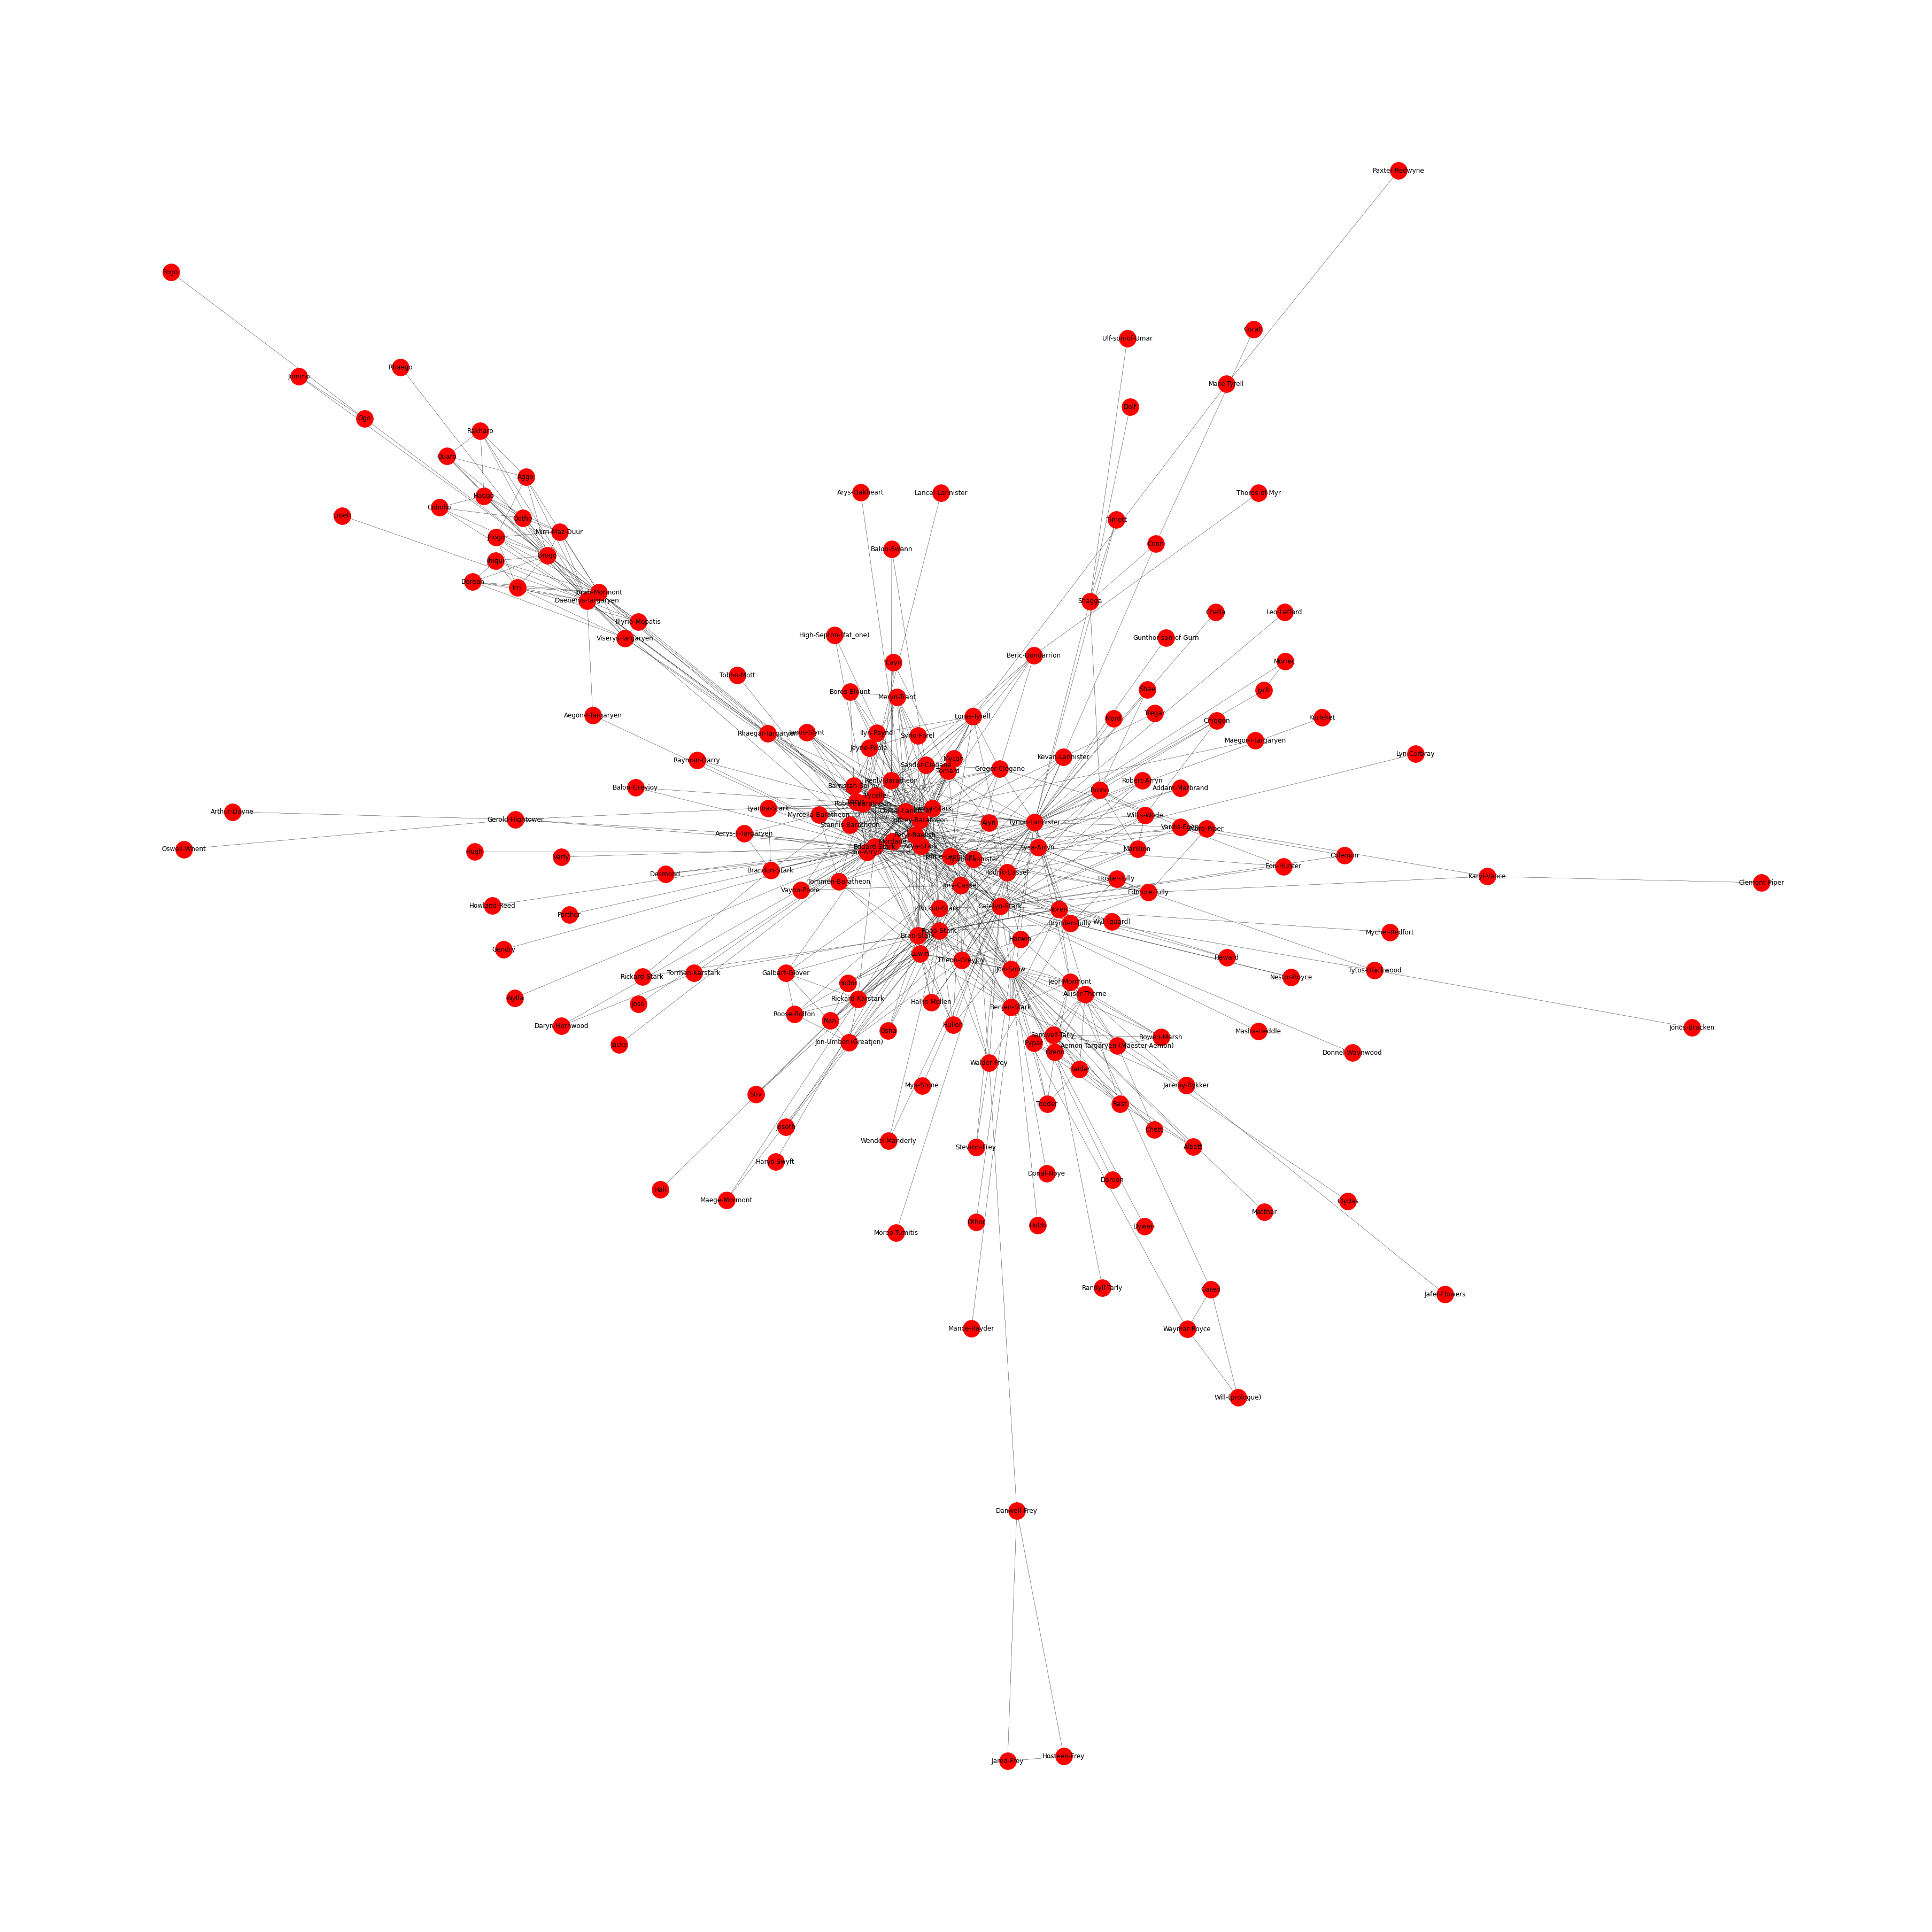

In [344]:
book1g = nx.Graph()

book1g = nx.from_pandas_edgelist(book1df,'Source','Target', edge_attr='weight')

plt.figure(figsize=(50,50))
nx.draw(book1g, with_labels = True, width=0.4, 
        node_color='red', node_size=1000)
plt.show()

Merging

In [345]:
targaryenbook1 = []
targaryenbook1 = book1df[book1df['Source'].str.contains("Targaryen")]
targaryenbook1
targaryen2book1 = []
targaryen2book1 = targaryenbook1[targaryenbook1['Target'].str.contains("Targaryen")]
targaryen2book1
targaryenstarkbook1 = []
targaryenstarkbook1 = targaryenbook1[targaryenbook1['Target'].str.contains("Stark")]
targaryenstarkbook1
combinedalltargaryenstark1 = targaryen2book1.append(targaryenstarkbook1)
combinedalltargaryenstark1
starkbook1 = []
starkbook1 = book1df[book1df['Source'].str.contains("Stark")]
starkbook1 
stark2book1 = starkbook1[starkbook1['Target'].str.contains('Stark')]
stark2book1
starktargaryenbook1 = []
starktargaryenbook1 = starkbook1[starkbook1['Target'].str.contains("Targaryen")]
starktargaryenbook1
combinedallstarktargaryen1 = stark2book1.append(starktargaryenbook1)
combinedallstarktargaryen1
combinedstarktargaryenbook1 = targaryenstarkbook1.append(starktargaryenbook1)
combinedstarktargaryenbook1
allcombinedbook1 = combinedalltargaryenstark1.append(combinedallstarktargaryen1)
allcombinedbook1



Source              Target        Type  weight  book
2     Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5     1
262  Daenerys-Targaryen   Rhaegar-Targaryen  Undirected       4     1
265  Daenerys-Targaryen   Viserys-Targaryen  Undirected      37     1
625   Rhaegar-Targaryen   Viserys-Targaryen  Undirected       5     1
3     Aegon-I-Targaryen        Eddard-Stark  Undirected       4     1
11   Aerys-II-Targaryen       Brandon-Stark  Undirected       4     1
12   Aerys-II-Targaryen        Eddard-Stark  Undirected      10     1
250  Daenerys-Targaryen        Eddard-Stark  Undirected       5     1
569  Maegor-I-Targaryen         Sansa-Stark  Undirected       4     1
623   Rhaegar-Targaryen         Sansa-Stark  Undirected       3     1
41           Arya-Stark        Benjen-Stark  Undirected       3     1
42           Arya-Stark          Bran-Stark  Undirected      14     1
43           Arya-Stark       Catelyn-Stark  Undirected       5     1
46           Arya-Stark        Eddard-Stark  Undirected      30     1
57           Arya-Stark        Rickon-Stark  Undirected       7     1
58           Arya-Stark          Robb-Stark  Undirected      15     1
62           Arya-Stark         Sansa-Stark  Undirected     104     1
87         Benjen-Stark          Bran-Stark  Undirected       6     1
94         Benjen-Stark          Robb-Stark  Undirected       7     1
113          Bran-Stark       Catelyn-Stark  Undirected      18     1
115          Bran-Stark        Eddard-Stark  Undirected      19     1
132          Bran-Stark       Rickard-Stark  Undirected       4     1
133          Bran-Stark        Rickon-Stark  Undirected      32     1
134          Bran-Stark          Robb-Stark  Undirected     112     1
137          Bran-Stark         Sansa-Stark  Undirected      10     1
143       Brandon-Stark        Eddard-Stark  Undirected      11     1
144       Brandon-Stark        Lyanna-Stark  Undirected       4     1
146       Brandon-Stark       Rickard-Stark  Undirected       3     1
172       Catelyn-Stark        Eddard-Stark  Undirected      64     1
192       Catelyn-Stark        Rickon-Stark  Undirected       3     1
193       Catelyn-Stark          Robb-Stark  Undirected      49     1
197       Catelyn-Stark         Sansa-Stark  Undirected       9     1
315        Eddard-Stark        Lyanna-Stark  Undirected      19     1
327        Eddard-Stark        Rickon-Stark  Undirected       4     1
328        Eddard-Stark          Robb-Stark  Undirected      16     1
332        Eddard-Stark         Sansa-Stark  Undirected      34     1
559        Lyanna-Stark         Sansa-Stark  Undirected       4     1
628        Rickon-Stark          Robb-Stark  Undirected      20     1
629        Rickon-Stark         Sansa-Stark  Undirected       8     1
635          Robb-Stark         Sansa-Stark  Undirected      13     1
325        Eddard-Stark   Rhaegar-Targaryen  Undirected      10     1

Creating Relationship Network

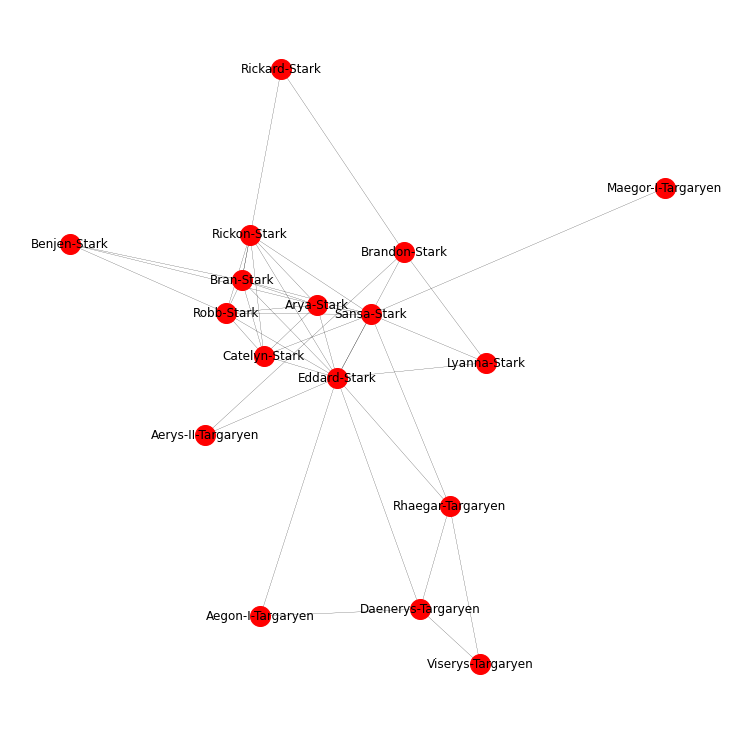

In [346]:
starktargaryen_book1_g = nx.from_pandas_edgelist(allcombinedbook1,'Source','Target', edge_attr='weight', create_using = nx.Graph())
plt.figure(figsize=(10,10))
nx.draw(starktargaryen_book1_g, with_labels = True, width=0.2, node_color='red', node_size=400)
plt.show(starktargaryen_book1_g)

Degree Distribution of Targaryen - Stark Relationship in Book 1

In [347]:
#degree frequency
degreedistbook1 = pd.DataFrame(nx.degree(starktargaryen_book1_g))
degreedistbook1[1].value_counts()

2     4
4     3
7     2
3     2
6     2
12    1
1     1
9     1
8     1
Name: 1, dtype: int64

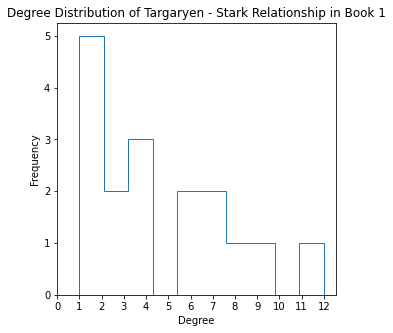

In [348]:
#plotting degree distribution
plt.figure(figsize=(5,5))
plt.hist(list(dict(nx.degree(starktargaryen_book1_g)).values()),histtype='step')
plt.title('Degree Distribution of Targaryen - Stark Relationship in Book 1')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.xticks(range(13))
plt.show()

Analysing book 1 stats: 

In [349]:

def transform_graph(graph,start):
    #display graph information 
    print(nx.info(graph))
    
    
    #calculating clustering coefficient for graph 
    cluster_coeff=sorted(list(nx.clustering(graph).values()))
    avg_coeff=(sum(cluster_coeff) / len(cluster_coeff))
    print('average clustering coefficient:', (avg_coeff))
    
    #calculating average degree of all nodes in the graph 
    avgdeg=nx.degree_histogram(graph)
    avgdegsum=[a*b
              for a, b in zip(avgdeg, range(0, len(avgdeg)))]
    print('Avg degree:', (sum(avgdegsum)/graph.number_of_nodes()))
    #Testing for assortativity
    assort = nx.degree_assortativity_coefficient(graph)  
    print('Assortativity coefficient:', assort)  
    #Produces value between -1 and 1
    #-1 means Hetrophily, 1 means Homophily
    if nx.is_connected(graph) == True:
        #function to calculate diameter 
        diameter = nx.diameter(graph)
        print('Diameter of graph:', (diameter))
        #display average shortest path length using average_shortest_path_length(graph)
        print('average shortest path length:', (nx.average_shortest_path_length(graph)))

In [350]:
transform_graph(starktargaryen_book1_g, degreedistbook1)

Graph with 17 nodes and 41 edges
average clustering coefficient: 0.6480349715643833
Avg degree: 4.823529411764706
Assortativity coefficient: -0.14867388868135983
Diameter of graph: 4
average shortest path length: 1.9044117647058822


Betweenness Centrality

In [351]:
bcbook1 = nx.betweenness_centrality(starktargaryen_book1_g, normalized = True)
#Higher value of means higher centrality
bcbook1

{'Aegon-I-Targaryen': 0.0,
 'Daenerys-Targaryen': 0.047777777777777794,
 'Rhaegar-Targaryen': 0.08138888888888891,
 'Viserys-Targaryen': 0.0,
 'Eddard-Stark': 0.4573611111111112,
 'Aerys-II-Targaryen': 0.0,
 'Brandon-Stark': 0.03944444444444444,
 'Maegor-I-Targaryen': 0.0,
 'Sansa-Stark': 0.20305555555555557,
 'Arya-Stark': 0.032638888888888884,
 'Benjen-Stark': 0.0,
 'Bran-Stark': 0.1161111111111111,
 'Catelyn-Stark': 0.0,
 'Rickon-Stark': 0.0,
 'Robb-Stark': 0.032638888888888884,
 'Rickard-Stark': 0.00625,
 'Lyanna-Stark': 0.008333333333333333}

<BarContainer object of 17 artists>

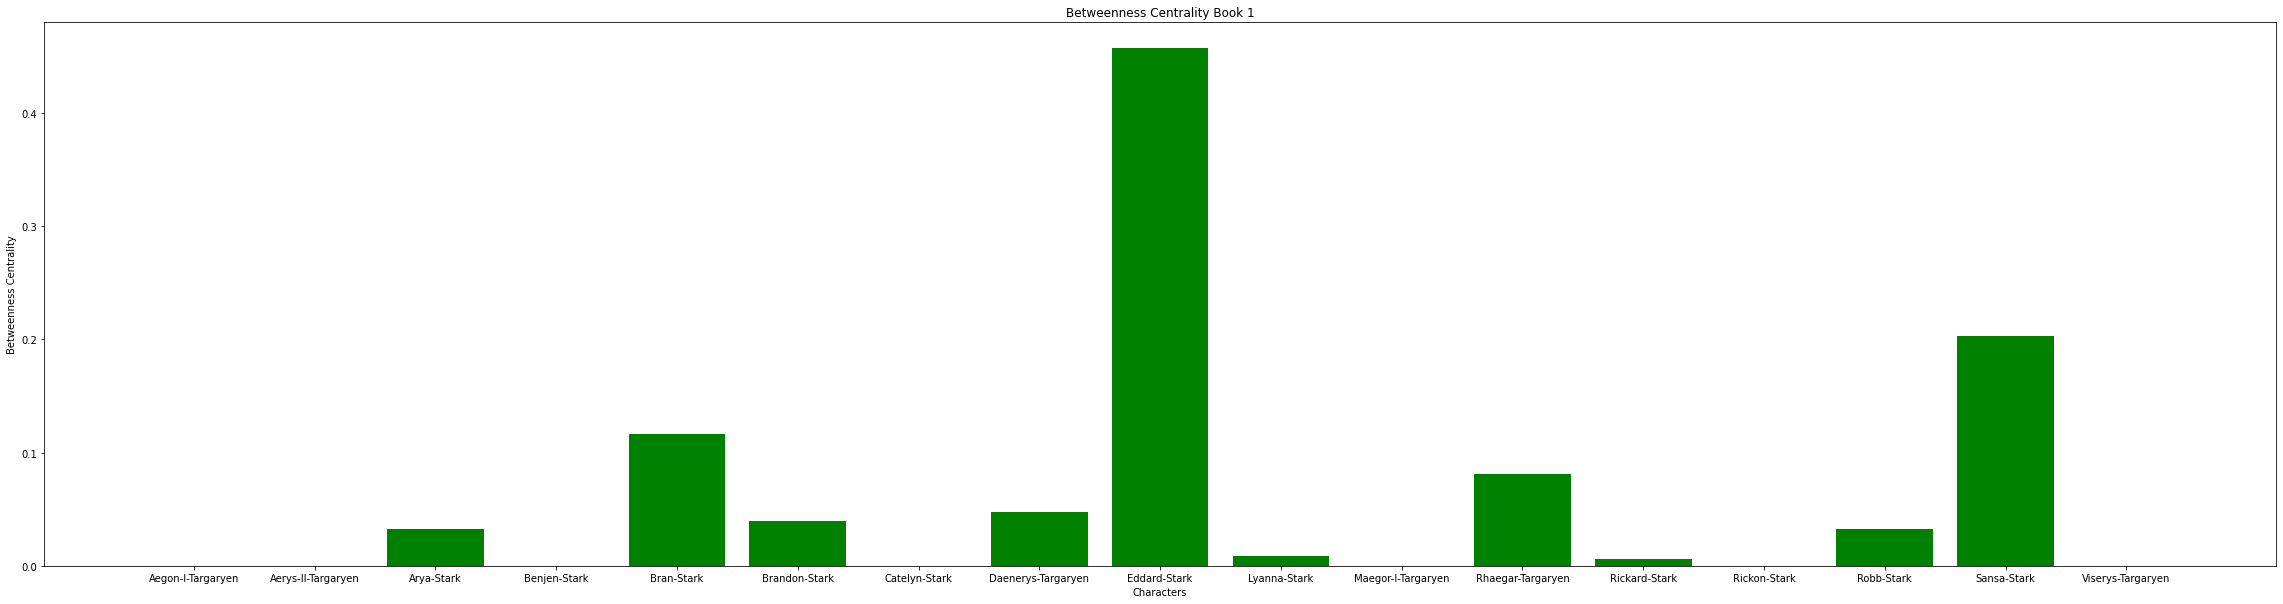

In [352]:
x,y = zip(*sorted(bcbook1.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality Book 1')
plt.bar(x,y,color = "g")

In [353]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

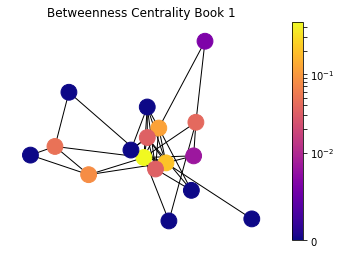

In [354]:
posbook1 = nx.spring_layout(starktargaryen_book1_g)
draw(starktargaryen_book1_g, posbook1, nx.betweenness_centrality(starktargaryen_book1_g), 'Betweenness Centrality Book 1')

Closeness Centrality

In [355]:
ccbook1 = nx.closeness_centrality(starktargaryen_book1_g)
ccbook1

{'Aegon-I-Targaryen': 0.48484848484848486,
 'Daenerys-Targaryen': 0.5161290322580645,
 'Rhaegar-Targaryen': 0.5333333333333333,
 'Viserys-Targaryen': 0.37209302325581395,
 'Eddard-Stark': 0.8,
 'Aerys-II-Targaryen': 0.48484848484848486,
 'Brandon-Stark': 0.5161290322580645,
 'Maegor-I-Targaryen': 0.42105263157894735,
 'Sansa-Stark': 0.6956521739130435,
 'Arya-Stark': 0.6153846153846154,
 'Benjen-Stark': 0.42105263157894735,
 'Bran-Stark': 0.64,
 'Catelyn-Stark': 0.5925925925925926,
 'Rickon-Stark': 0.5925925925925926,
 'Robb-Stark': 0.6153846153846154,
 'Rickard-Stark': 0.4444444444444444,
 'Lyanna-Stark': 0.5161290322580645}

<BarContainer object of 17 artists>

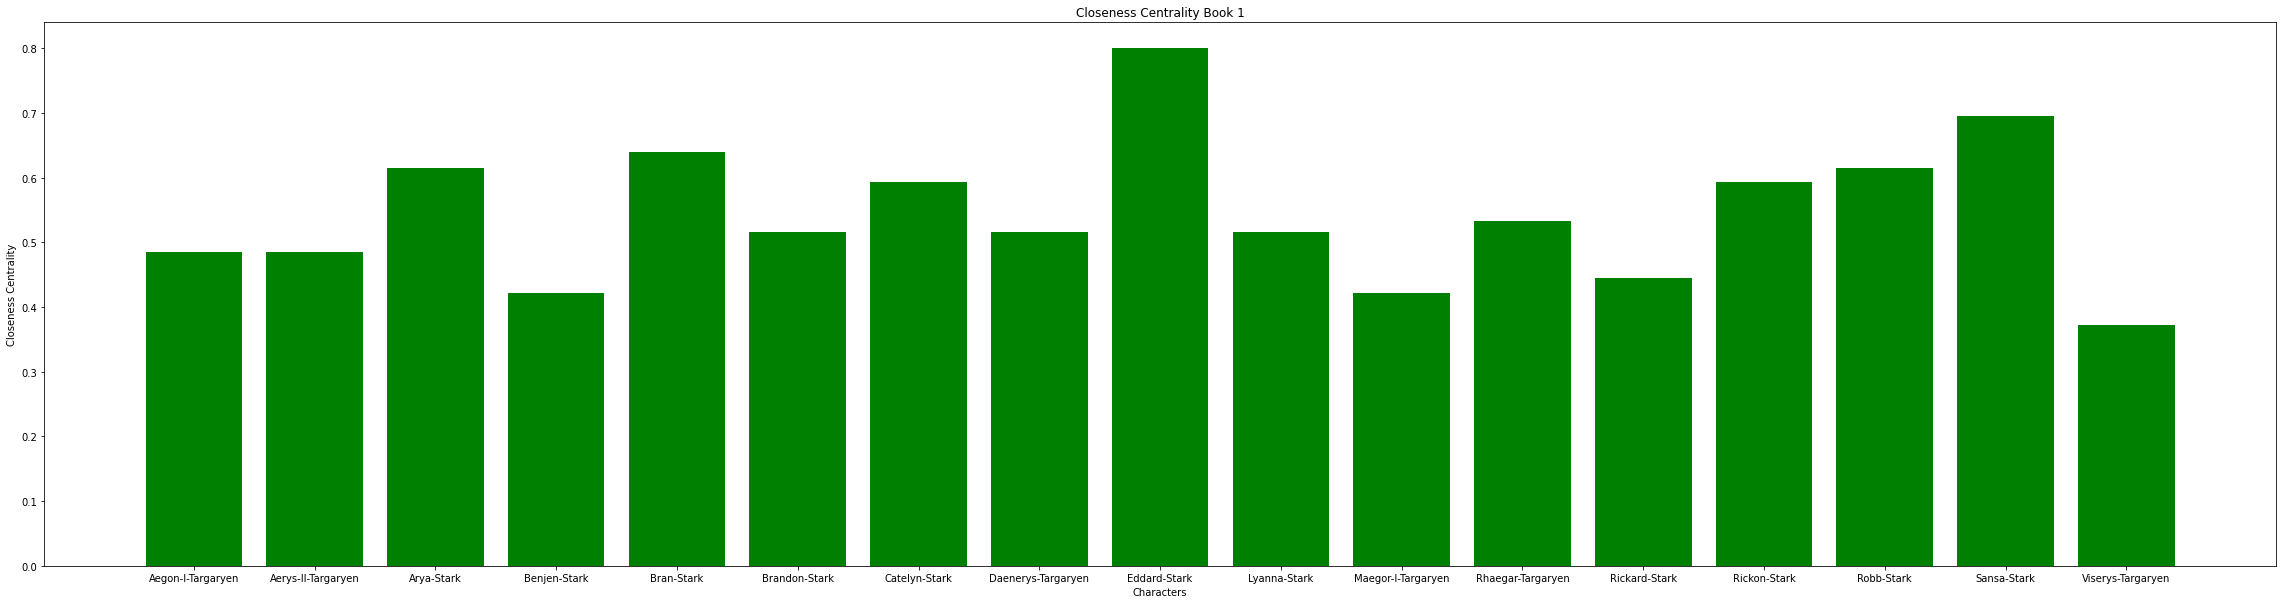

In [356]:
x,y = zip(*sorted(ccbook1.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality Book 1')
plt.bar(x,y,color = "g")

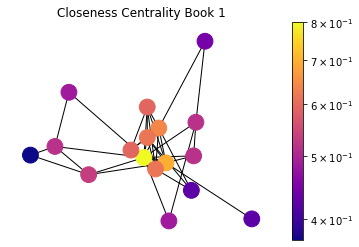

In [357]:
pos = nx.spring_layout(starktargaryen_book1_g)
draw(starktargaryen_book1_g, posbook1, nx.closeness_centrality(starktargaryen_book1_g), 'Closeness Centrality Book 1')

Merging Betweenness and Connectedness outputs

In [358]:
from collections import defaultdict
ddbook1 = defaultdict(list)

for d in (bcbook1, ccbook1): # you can list as many input dicts as you want here
    for key, value in d.items():
        ddbook1[key].append(value)

bcccbook1 = pd.DataFrame.from_dict(ddbook1)
bcccbook1 = bcccbook1.transpose()
bcccbook1

0         1
Aegon-I-Targaryen   0.000000  0.484848
Daenerys-Targaryen  0.047778  0.516129
Rhaegar-Targaryen   0.081389  0.533333
Viserys-Targaryen   0.000000  0.372093
Eddard-Stark        0.457361  0.800000
Aerys-II-Targaryen  0.000000  0.484848
Brandon-Stark       0.039444  0.516129
Maegor-I-Targaryen  0.000000  0.421053
Sansa-Stark         0.203056  0.695652
Arya-Stark          0.032639  0.615385
Benjen-Stark        0.000000  0.421053
Bran-Stark          0.116111  0.640000
Catelyn-Stark       0.000000  0.592593
Rickon-Stark        0.000000  0.592593
Robb-Stark          0.032639  0.615385
Rickard-Stark       0.006250  0.444444
Lyanna-Stark        0.008333  0.516129

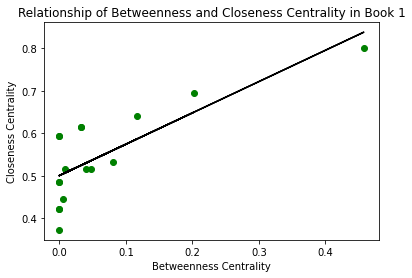

In [359]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

Xbook1 = bcccbook1[0].values[:,np.newaxis]
ybook1 = bcccbook1[1].values


model2 = LinearRegression()
model2.fit(Xbook1, ybook1)

plt.scatter(Xbook1, ybook1,color='g')
plt.plot(Xbook1, model2.predict(Xbook1),color='k')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Relationship of Betweenness and Closeness Centrality in Book 1')

plt.show()

Testing for Communities

In [360]:
from networkx.algorithms.community.centrality import girvan_newman
communitybook1 = girvan_newman(starktargaryen_book1_g)
commbook1 = tuple(sorted(c) for c in next(communitybook1))
commbook1

(['Aegon-I-Targaryen',
  'Daenerys-Targaryen',
  'Rhaegar-Targaryen',
  'Viserys-Targaryen'],
 ['Aerys-II-Targaryen',
  'Arya-Stark',
  'Benjen-Stark',
  'Bran-Stark',
  'Brandon-Stark',
  'Catelyn-Stark',
  'Eddard-Stark',
  'Lyanna-Stark',
  'Maegor-I-Targaryen',
  'Rickard-Stark',
  'Rickon-Stark',
  'Robb-Stark',
  'Sansa-Stark'])

Book 2 Network

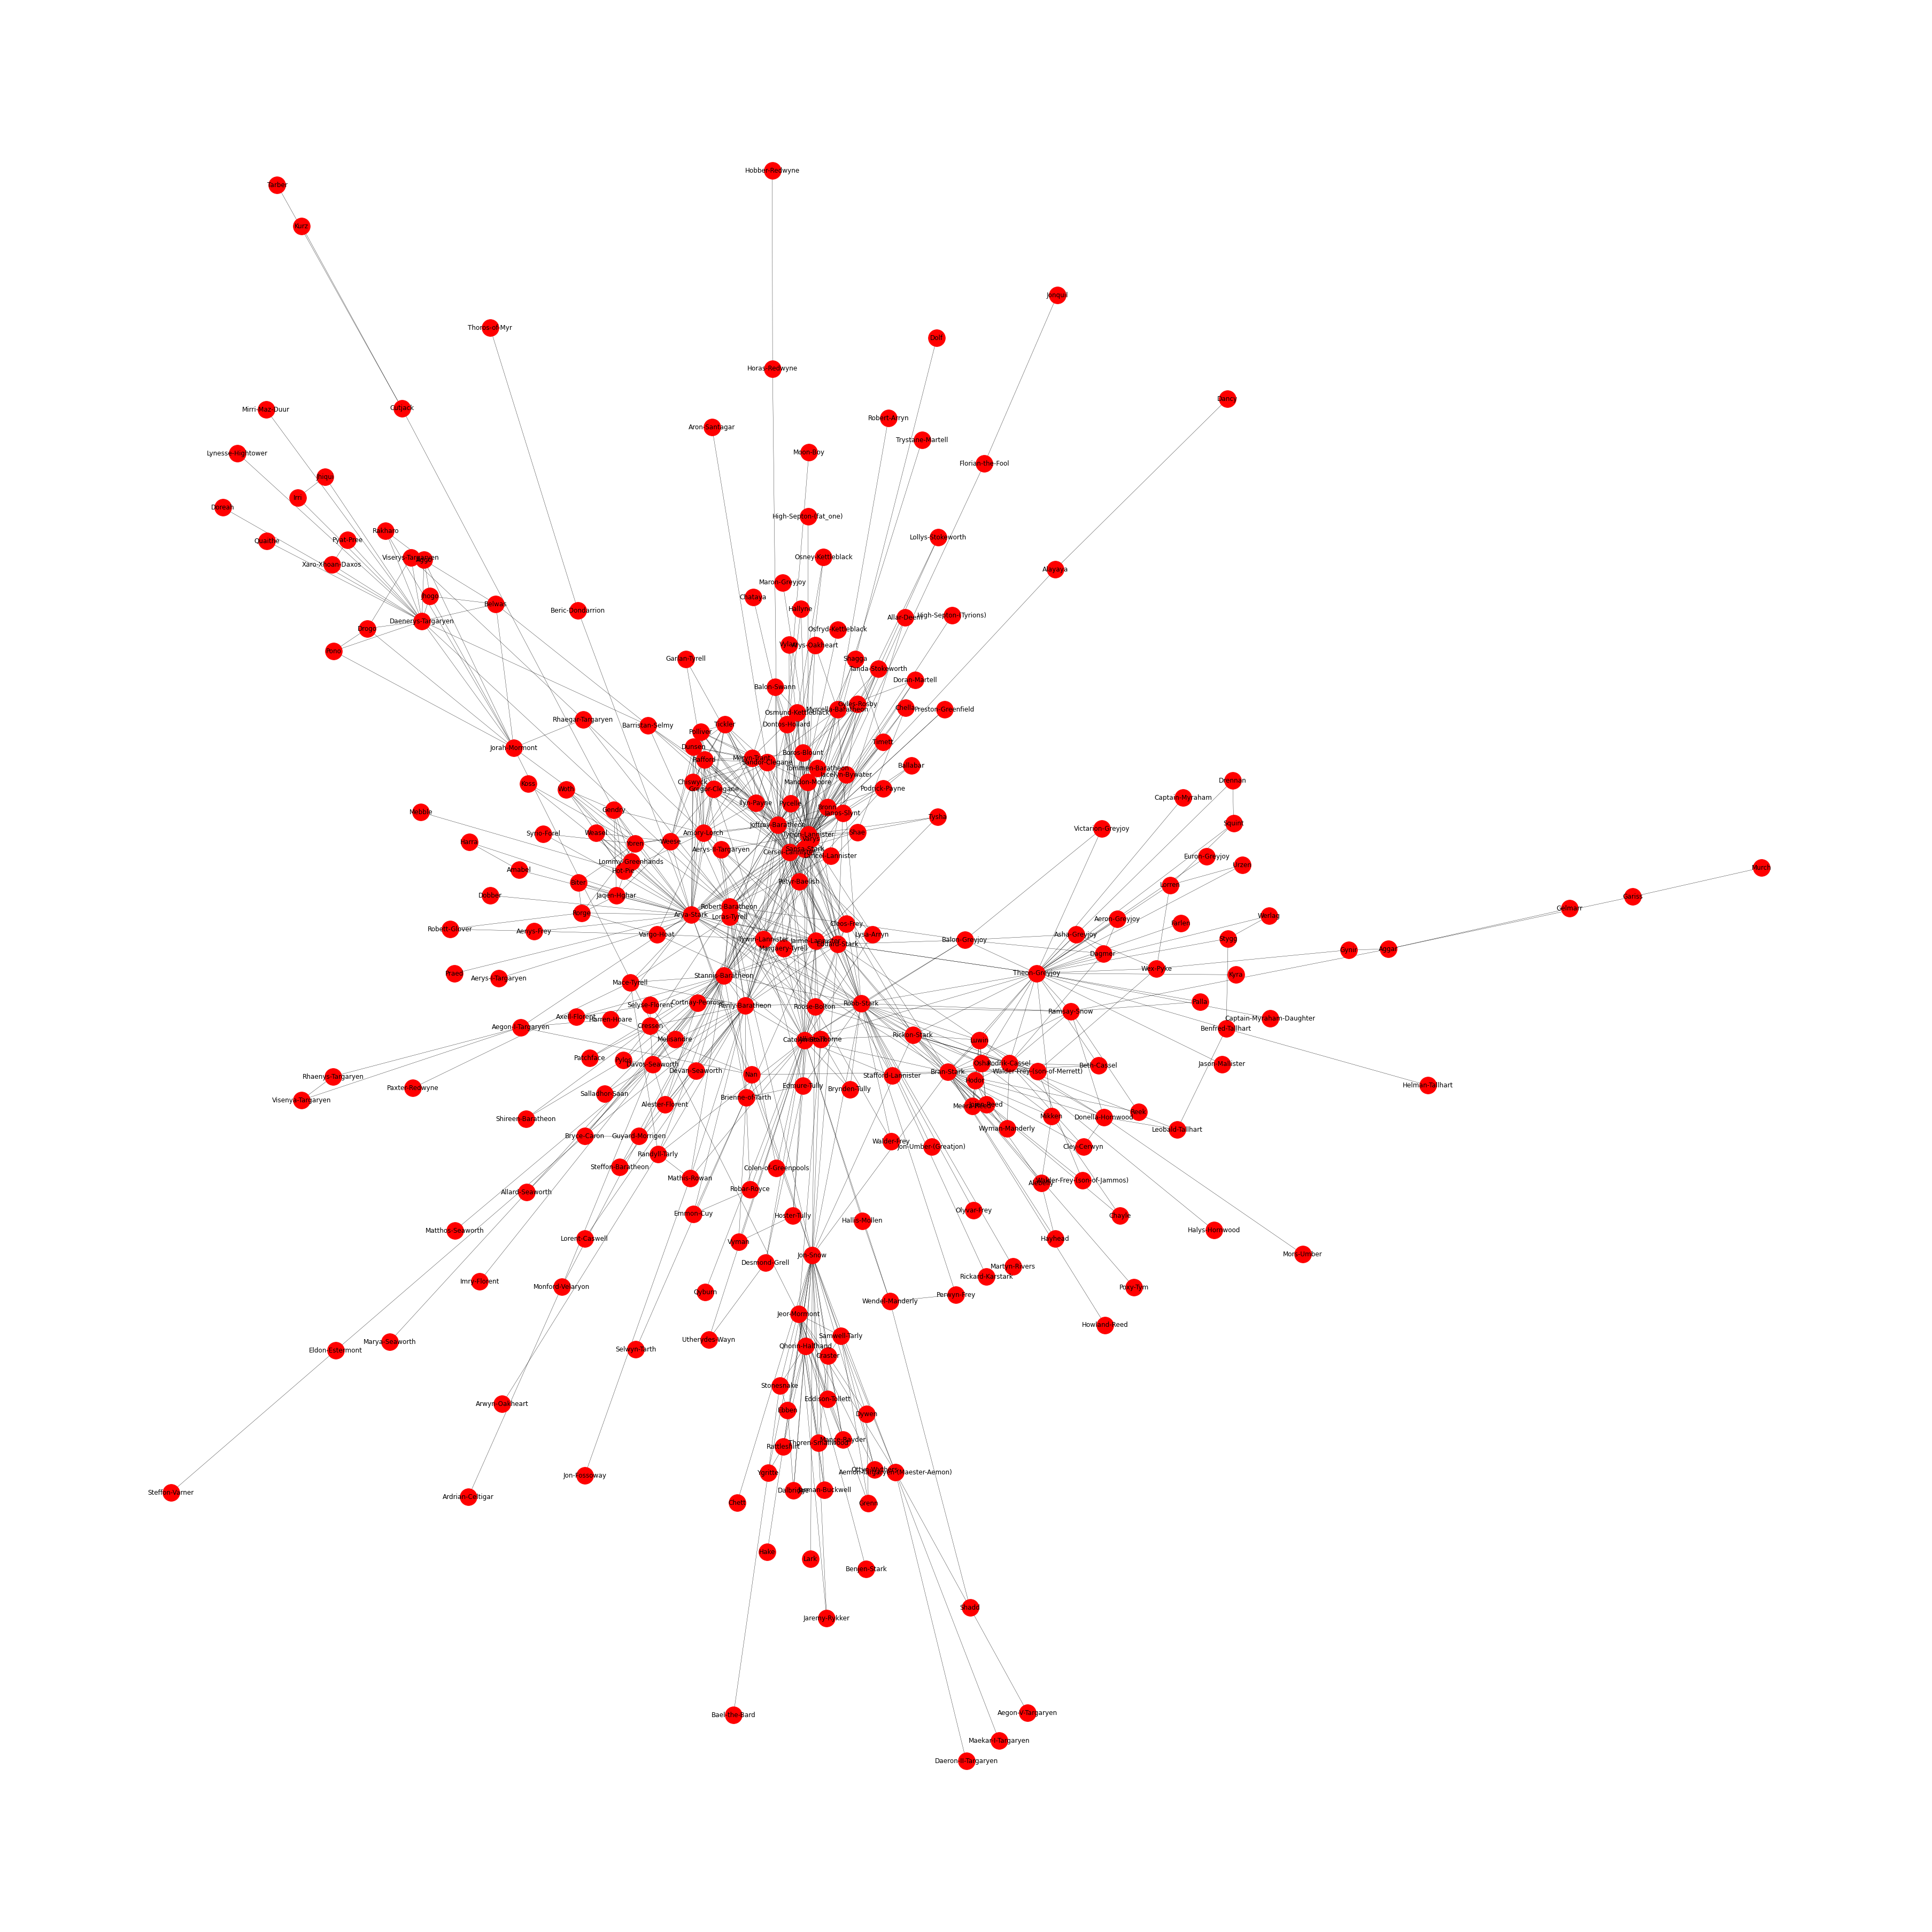

In [361]:
book2g = nx.Graph()

book2g = nx.from_pandas_edgelist(book2df,'Source','Target', edge_attr='weight')


plt.figure(figsize=(50,50))
nx.draw(book2g, with_labels = True, width=0.4, 
        node_color='red', node_size=1000)
plt.show()

Merging Book 2


In [362]:
targaryenbook2 = []
targaryenbook2 = book2df[book2df['Source'].str.contains("Targaryen")]
targaryenbook2
targaryen2book2 = []
targaryen2book2 = targaryenbook2[targaryenbook2['Target'].str.contains("Targaryen")]
targaryen2book2
targaryenstarkbook2 = []
targaryenstarkbook2 = targaryenbook2[targaryenbook2['Target'].str.contains("Stark")]
targaryenstarkbook2
combinedalltargaryenstark2 = targaryen2book2.append(targaryenstarkbook2)
combinedalltargaryenstark2
starkbook2 = []
starkbook2 = book2df[book2df['Source'].str.contains("Stark")]
starkbook2
stark2book2 = starkbook2[starkbook2['Target'].str.contains('Stark')]
stark2book2
starktargaryenbook2 = []
starktargaryenbook2 = starkbook2[starkbook2['Target'].str.contains("Targaryen")]
starktargaryenbook2
combinedallstarktargaryen2 = stark2book2.append(starktargaryenbook2)
combinedallstarktargaryen2
combinedstarktargaryenbook2 = targaryenstarkbook2.append(starktargaryenbook2)
combinedstarktargaryenbook2
allcombinedbook2 = combinedalltargaryenstark2.append(combinedallstarktargaryen2)
allcombinedbook2



Source                           Target  \
2                  Aegon-I-Targaryen                Rhaenys-Targaryen   
4                  Aegon-I-Targaryen                Visenya-Targaryen   
5                  Aegon-V-Targaryen  Aemon-Targaryen-(Maester-Aemon)   
6    Aemon-Targaryen-(Maester-Aemon)              Daeron-II-Targaryen   
9    Aemon-Targaryen-(Maester-Aemon)               Maekar-I-Targaryen   
17                Aerys-II-Targaryen                Rhaegar-Targaryen   
344               Daenerys-Targaryen                Viserys-Targaryen   
694                Rhaegar-Targaryen                Viserys-Targaryen   
695                Rhaenys-Targaryen                Visenya-Targaryen   
15                Aerys-II-Targaryen                     Eddard-Stark   
73                        Arya-Stark                       Bran-Stark   
78                        Arya-Stark                     Eddard-Stark   
94                        Arya-Stark                     Rickon-Stark   
95                        Arya-Stark                       Robb-Stark   
99                        Arya-Stark                      Sansa-Stark   
161                       Bran-Stark                    Catelyn-Stark   
165                       Bran-Stark                     Eddard-Stark   
179                       Bran-Stark                     Rickon-Stark   
180                       Bran-Stark                       Robb-Stark   
182                       Bran-Stark                      Sansa-Stark   
222                    Catelyn-Stark                     Eddard-Stark   
234                    Catelyn-Stark                     Rickon-Stark   
236                    Catelyn-Stark                       Robb-Stark   
238                    Catelyn-Stark                      Sansa-Stark   
405                     Eddard-Stark                     Rickon-Stark   
406                     Eddard-Stark                       Robb-Stark   
697                     Rickon-Stark                       Robb-Stark   
699                     Rickon-Stark                      Sansa-Stark   
705                       Robb-Stark                      Sansa-Stark   

           Type  weight  book  
2    Undirected       4   2.0  
4    Undirected       3   2.0  
5    Undirected       3   2.0  
6    Undirected       3   2.0  
9    Undirected       3   2.0  
17   Undirected       4   2.0  
344  Undirected       3   2.0  
694  Undirected       3   2.0  
695  Undirected       3   2.0  
15   Undirected       5   2.0  
73   Undirected      10   2.0  
78   Undirected       6   2.0  
94   Undirected       5   2.0  
95   Undirected      15   2.0  
99   Undirected      20   2.0  
161  Undirected       3   2.0  
165  Undirected       4   2.0  
179  Undirected      54   2.0  
180  Undirected      28   2.0  
182  Undirected       5   2.0  
222  Undirected      12   2.0  
234  Undirected       3   2.0  
236  Undirected      27   2.0  
238  Undirected       3   2.0  
405  Undirected       3   2.0  
406  Undirected      11   2.0  
697  Undirected      12   2.0  
699  Undirected       5   2.0  
705  Undirected      11   2.0

Creating Relationship network

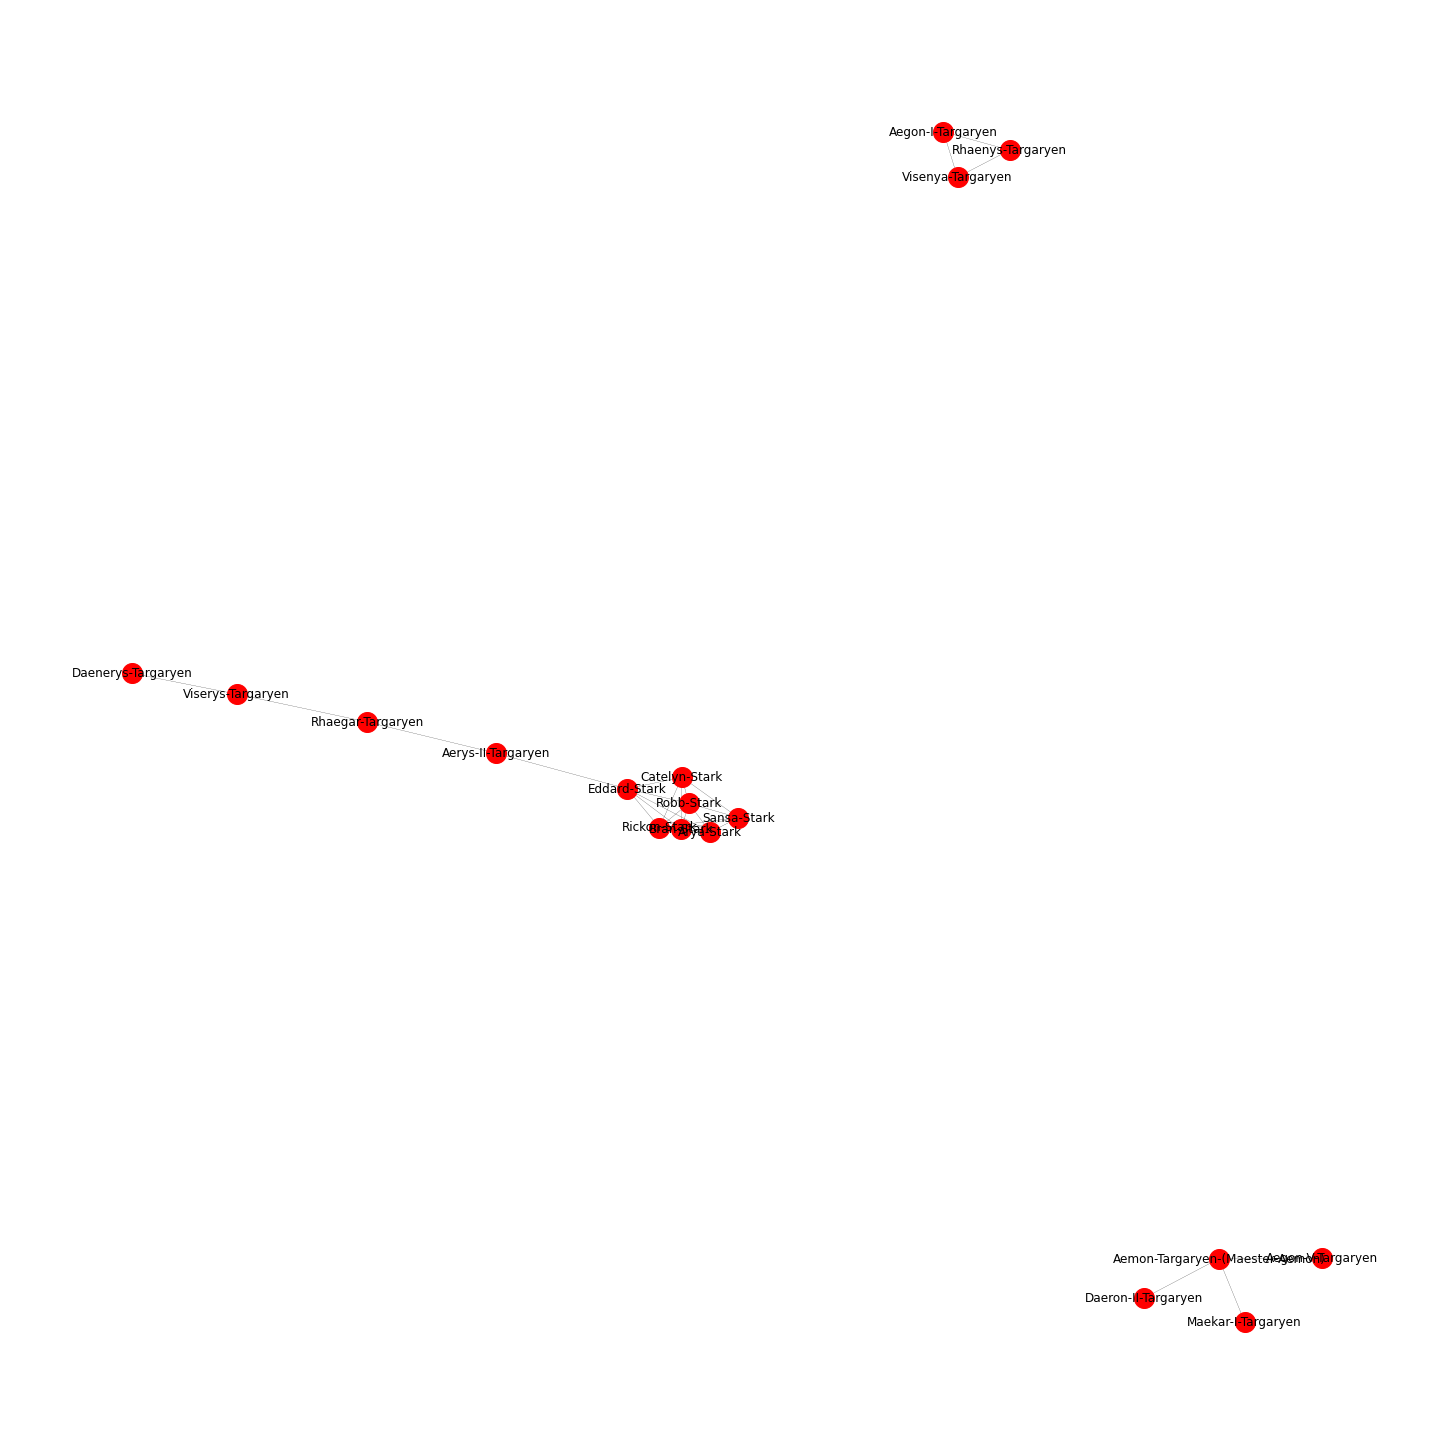

In [363]:
starktargaryen_book2_g = nx.from_pandas_edgelist(allcombinedbook2,'Source','Target', edge_attr='weight', create_using = nx.Graph())
plt.figure(figsize=(20,20))
nx.draw(starktargaryen_book2_g, with_labels = True, width=0.2, node_color='red', node_size=400)
plt.show(starktargaryen_book2_g)

Degree Distribution of Targaryen - Stark Relationship in Book 2

In [364]:
#degree frequency
degreedistbook2 = pd.DataFrame(nx.degree(starktargaryen_book2_g))
degreedistbook2[1].value_counts()

2    6
1    4
6    4
5    3
3    1
Name: 1, dtype: int64

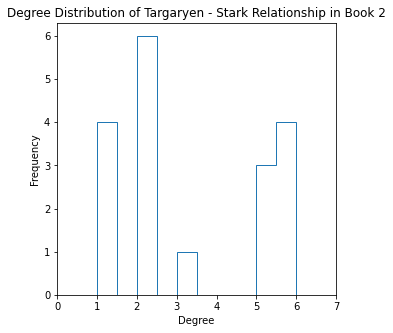

In [365]:
#plotting degree distribution
plt.figure(figsize=(5,5))
plt.hist(list(dict(nx.degree(starktargaryen_book2_g)).values()),histtype='step')
plt.title('Degree Distribution of Targaryen - Stark Relationship in Book 2')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.xticks(range(8))
plt.show()

Analysing book 2 stats: 

In [366]:
transform_graph(starktargaryen_book2_g, degreedistbook2)

Graph with 18 nodes and 29 edges
average clustering coefficient: 0.4944444444444446
Avg degree: 3.2222222222222223
Assortativity coefficient: 0.7873120645397869


Betweenness Centrality

In [367]:
bcbook2 = nx.betweenness_centrality(starktargaryen_book2_g, normalized = True)
#Higher value of means higher centrality
bcbook2

{'Aegon-I-Targaryen': 0.0,
 'Rhaenys-Targaryen': 0.0,
 'Visenya-Targaryen': 0.0,
 'Aegon-V-Targaryen': 0.0,
 'Aemon-Targaryen-(Maester-Aemon)': 0.022058823529411763,
 'Daeron-II-Targaryen': 0.0,
 'Maekar-I-Targaryen': 0.0,
 'Aerys-II-Targaryen': 0.15441176470588236,
 'Rhaegar-Targaryen': 0.11764705882352941,
 'Daenerys-Targaryen': 0.0,
 'Viserys-Targaryen': 0.0661764705882353,
 'Eddard-Stark': 0.17794117647058824,
 'Arya-Stark': 0.007352941176470588,
 'Bran-Stark': 0.008823529411764707,
 'Rickon-Stark': 0.008823529411764707,
 'Robb-Stark': 0.008823529411764707,
 'Sansa-Stark': 0.0014705882352941176,
 'Catelyn-Stark': 0.007352941176470588}

<BarContainer object of 18 artists>

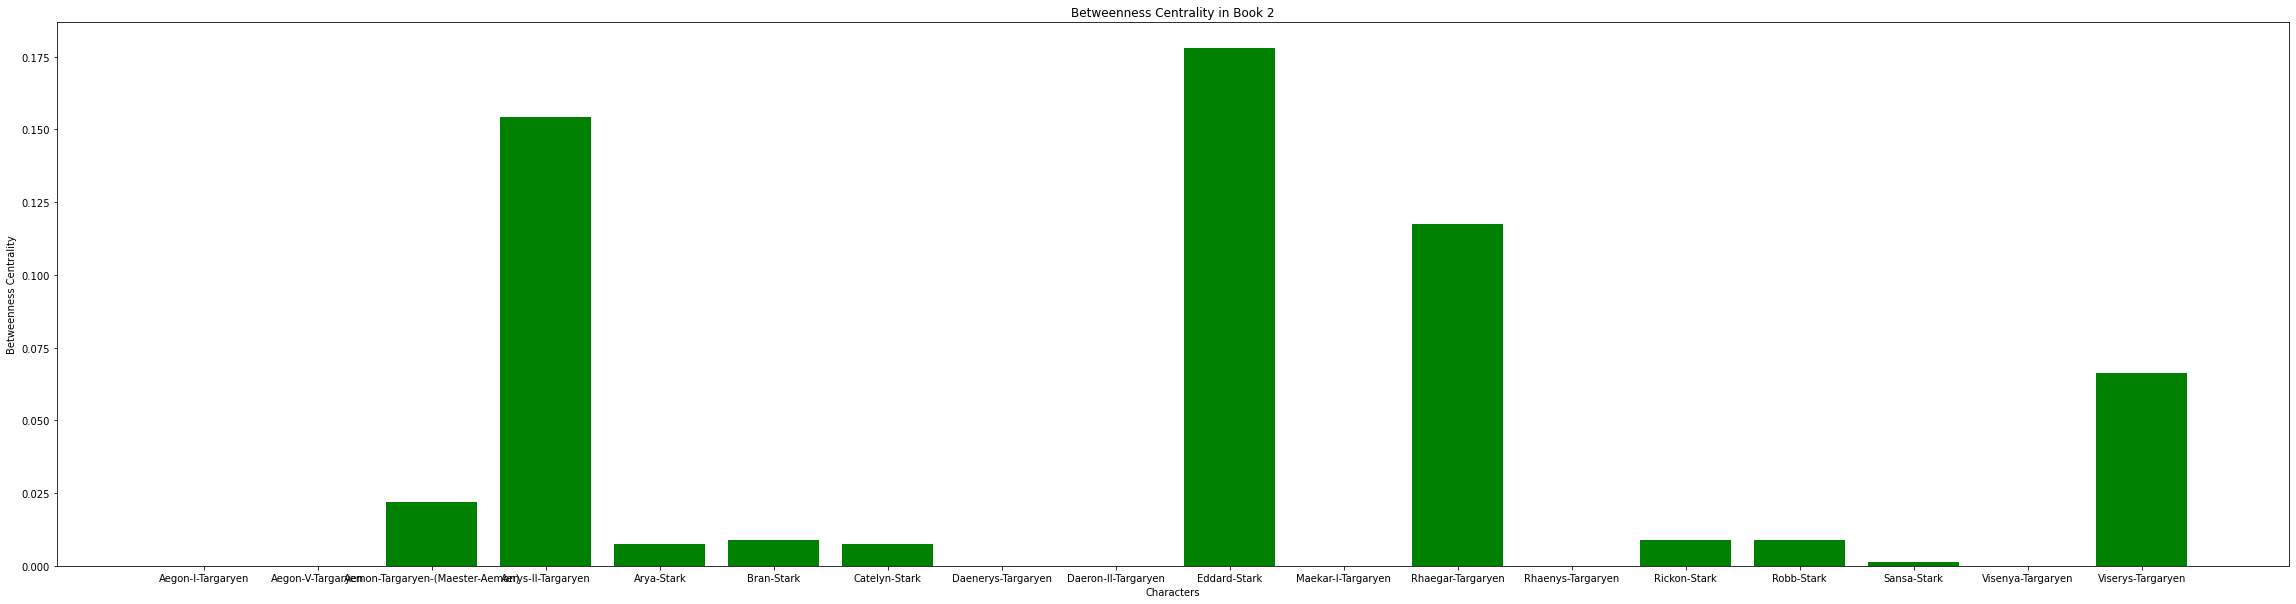

In [368]:
x,y = zip(*sorted(bcbook2.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality in Book 2')
plt.bar(x,y,color = "g")

In [369]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

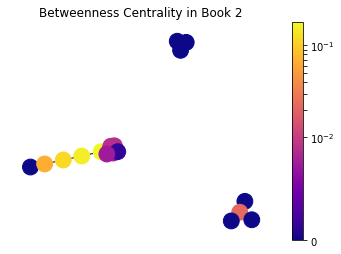

In [370]:
posbook2 = nx.spring_layout(starktargaryen_book2_g)
draw(starktargaryen_book2_g, posbook2, nx.betweenness_centrality(starktargaryen_book2_g), 'Betweenness Centrality in Book 2')

Closeness Centrality

In [371]:
ccbook2 = nx.closeness_centrality(starktargaryen_book2_g)
ccbook2

{'Aegon-I-Targaryen': 0.11764705882352941,
 'Rhaenys-Targaryen': 0.11764705882352941,
 'Visenya-Targaryen': 0.11764705882352941,
 'Aegon-V-Targaryen': 0.10588235294117647,
 'Aemon-Targaryen-(Maester-Aemon)': 0.17647058823529413,
 'Daeron-II-Targaryen': 0.10588235294117647,
 'Maekar-I-Targaryen': 0.10588235294117647,
 'Aerys-II-Targaryen': 0.29411764705882354,
 'Rhaegar-Targaryen': 0.23529411764705885,
 'Daenerys-Targaryen': 0.14347202295552366,
 'Viserys-Targaryen': 0.18382352941176472,
 'Eddard-Stark': 0.34602076124567477,
 'Arya-Stark': 0.2801120448179272,
 'Bran-Stark': 0.29411764705882354,
 'Rickon-Stark': 0.29411764705882354,
 'Robb-Stark': 0.29411764705882354,
 'Sansa-Stark': 0.23529411764705885,
 'Catelyn-Stark': 0.2801120448179272}

<BarContainer object of 18 artists>

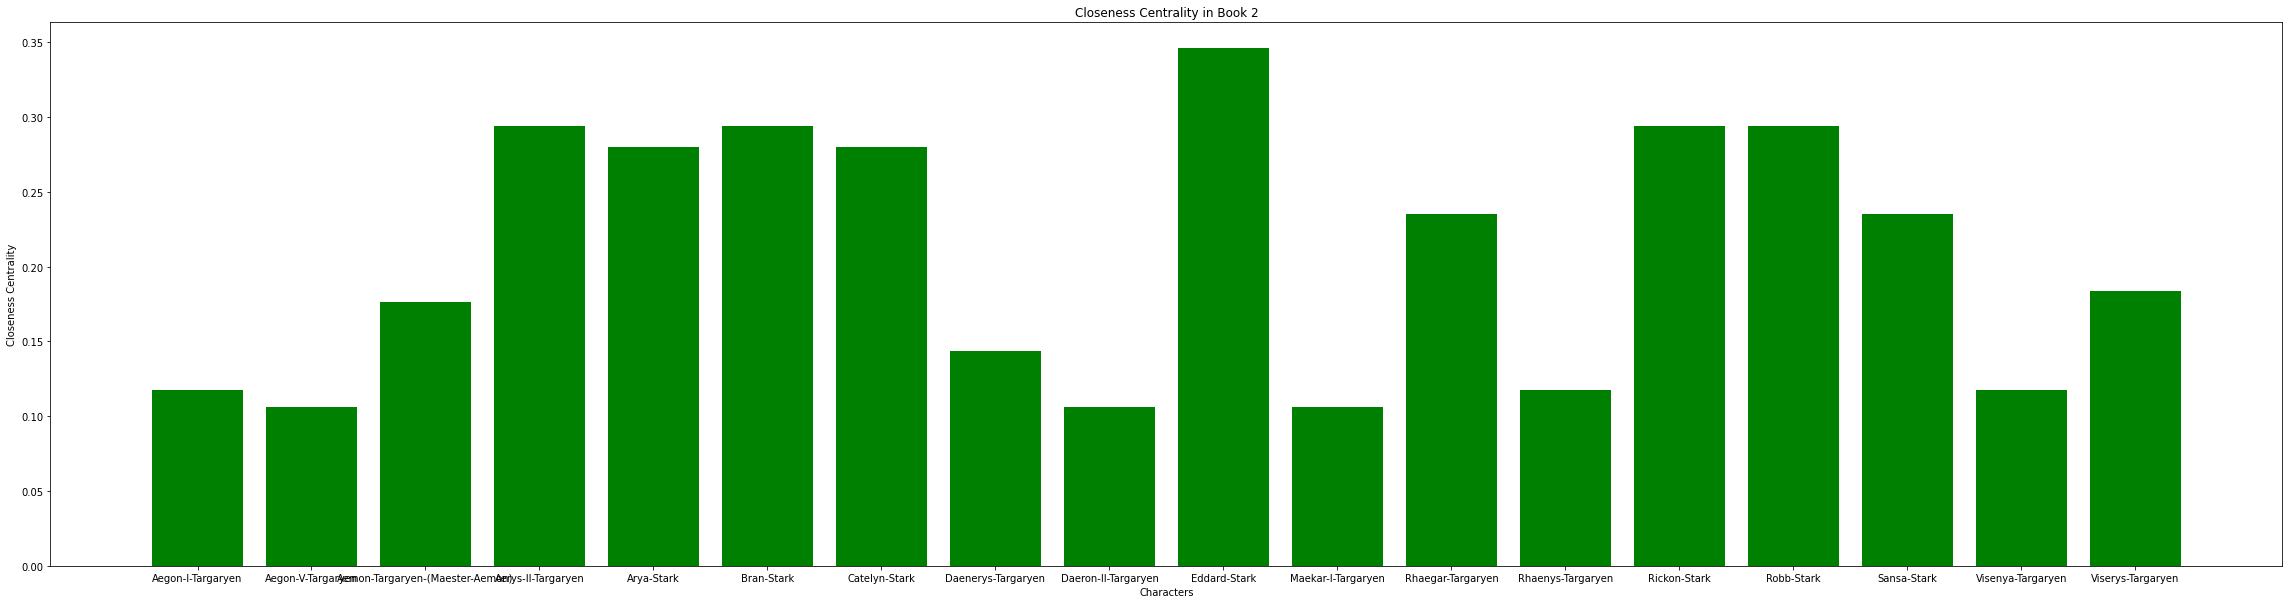

In [372]:
x,y = zip(*sorted(ccbook2.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality in Book 2')
plt.bar(x,y,color = "g")

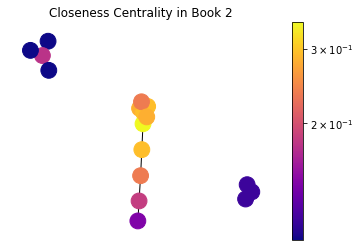

In [373]:
posbook2 = nx.spring_layout(starktargaryen_book2_g)
draw(starktargaryen_book2_g, posbook2, nx.closeness_centrality(starktargaryen_book2_g), 'Closeness Centrality in Book 2')

Merging Betweenness and Connectedness outputs

In [374]:
from collections import defaultdict
ddbook2 = defaultdict(list)

for d in (bcbook2, ccbook2): # you can list as many input dicts as you want here
    for key, value in d.items():
        ddbook2[key].append(value)

bcccbook2 = pd.DataFrame.from_dict(ddbook2)
bcccbook2 = bcccbook2.transpose()
bcccbook2

0         1
Aegon-I-Targaryen                0.000000  0.117647
Rhaenys-Targaryen                0.000000  0.117647
Visenya-Targaryen                0.000000  0.117647
Aegon-V-Targaryen                0.000000  0.105882
Aemon-Targaryen-(Maester-Aemon)  0.022059  0.176471
Daeron-II-Targaryen              0.000000  0.105882
Maekar-I-Targaryen               0.000000  0.105882
Aerys-II-Targaryen               0.154412  0.294118
Rhaegar-Targaryen                0.117647  0.235294
Daenerys-Targaryen               0.000000  0.143472
Viserys-Targaryen                0.066176  0.183824
Eddard-Stark                     0.177941  0.346021
Arya-Stark                       0.007353  0.280112
Bran-Stark                       0.008824  0.294118
Rickon-Stark                     0.008824  0.294118
Robb-Stark                       0.008824  0.294118
Sansa-Stark                      0.001471  0.235294
Catelyn-Stark                    0.007353  0.280112

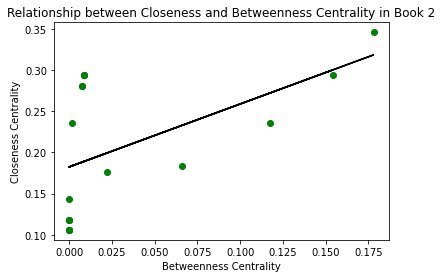

In [375]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

Xbook2 = bcccbook2[0].values[:,np.newaxis]
ybook2 = bcccbook2[1].values


model2 = LinearRegression()
model2.fit(Xbook2, ybook2)

plt.scatter(Xbook2, ybook2,color='g')
plt.plot(Xbook2, model2.predict(Xbook2),color='k')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Relationship between Closeness and Betweenness Centrality in Book 2')

plt.show()

Testing for Communities

In [376]:
from networkx.algorithms.community.centrality import girvan_newman
communitybook2 = girvan_newman(starktargaryen_book2_g)
commbook2 = tuple(sorted(c) for c in next(communitybook2))
commbook2

(['Aegon-I-Targaryen', 'Rhaenys-Targaryen', 'Visenya-Targaryen'],
 ['Aegon-V-Targaryen',
  'Aemon-Targaryen-(Maester-Aemon)',
  'Daeron-II-Targaryen',
  'Maekar-I-Targaryen'],
 ['Aerys-II-Targaryen',
  'Daenerys-Targaryen',
  'Rhaegar-Targaryen',
  'Viserys-Targaryen'],
 ['Arya-Stark',
  'Bran-Stark',
  'Catelyn-Stark',
  'Eddard-Stark',
  'Rickon-Stark',
  'Robb-Stark',
  'Sansa-Stark'])

Book 3 Network

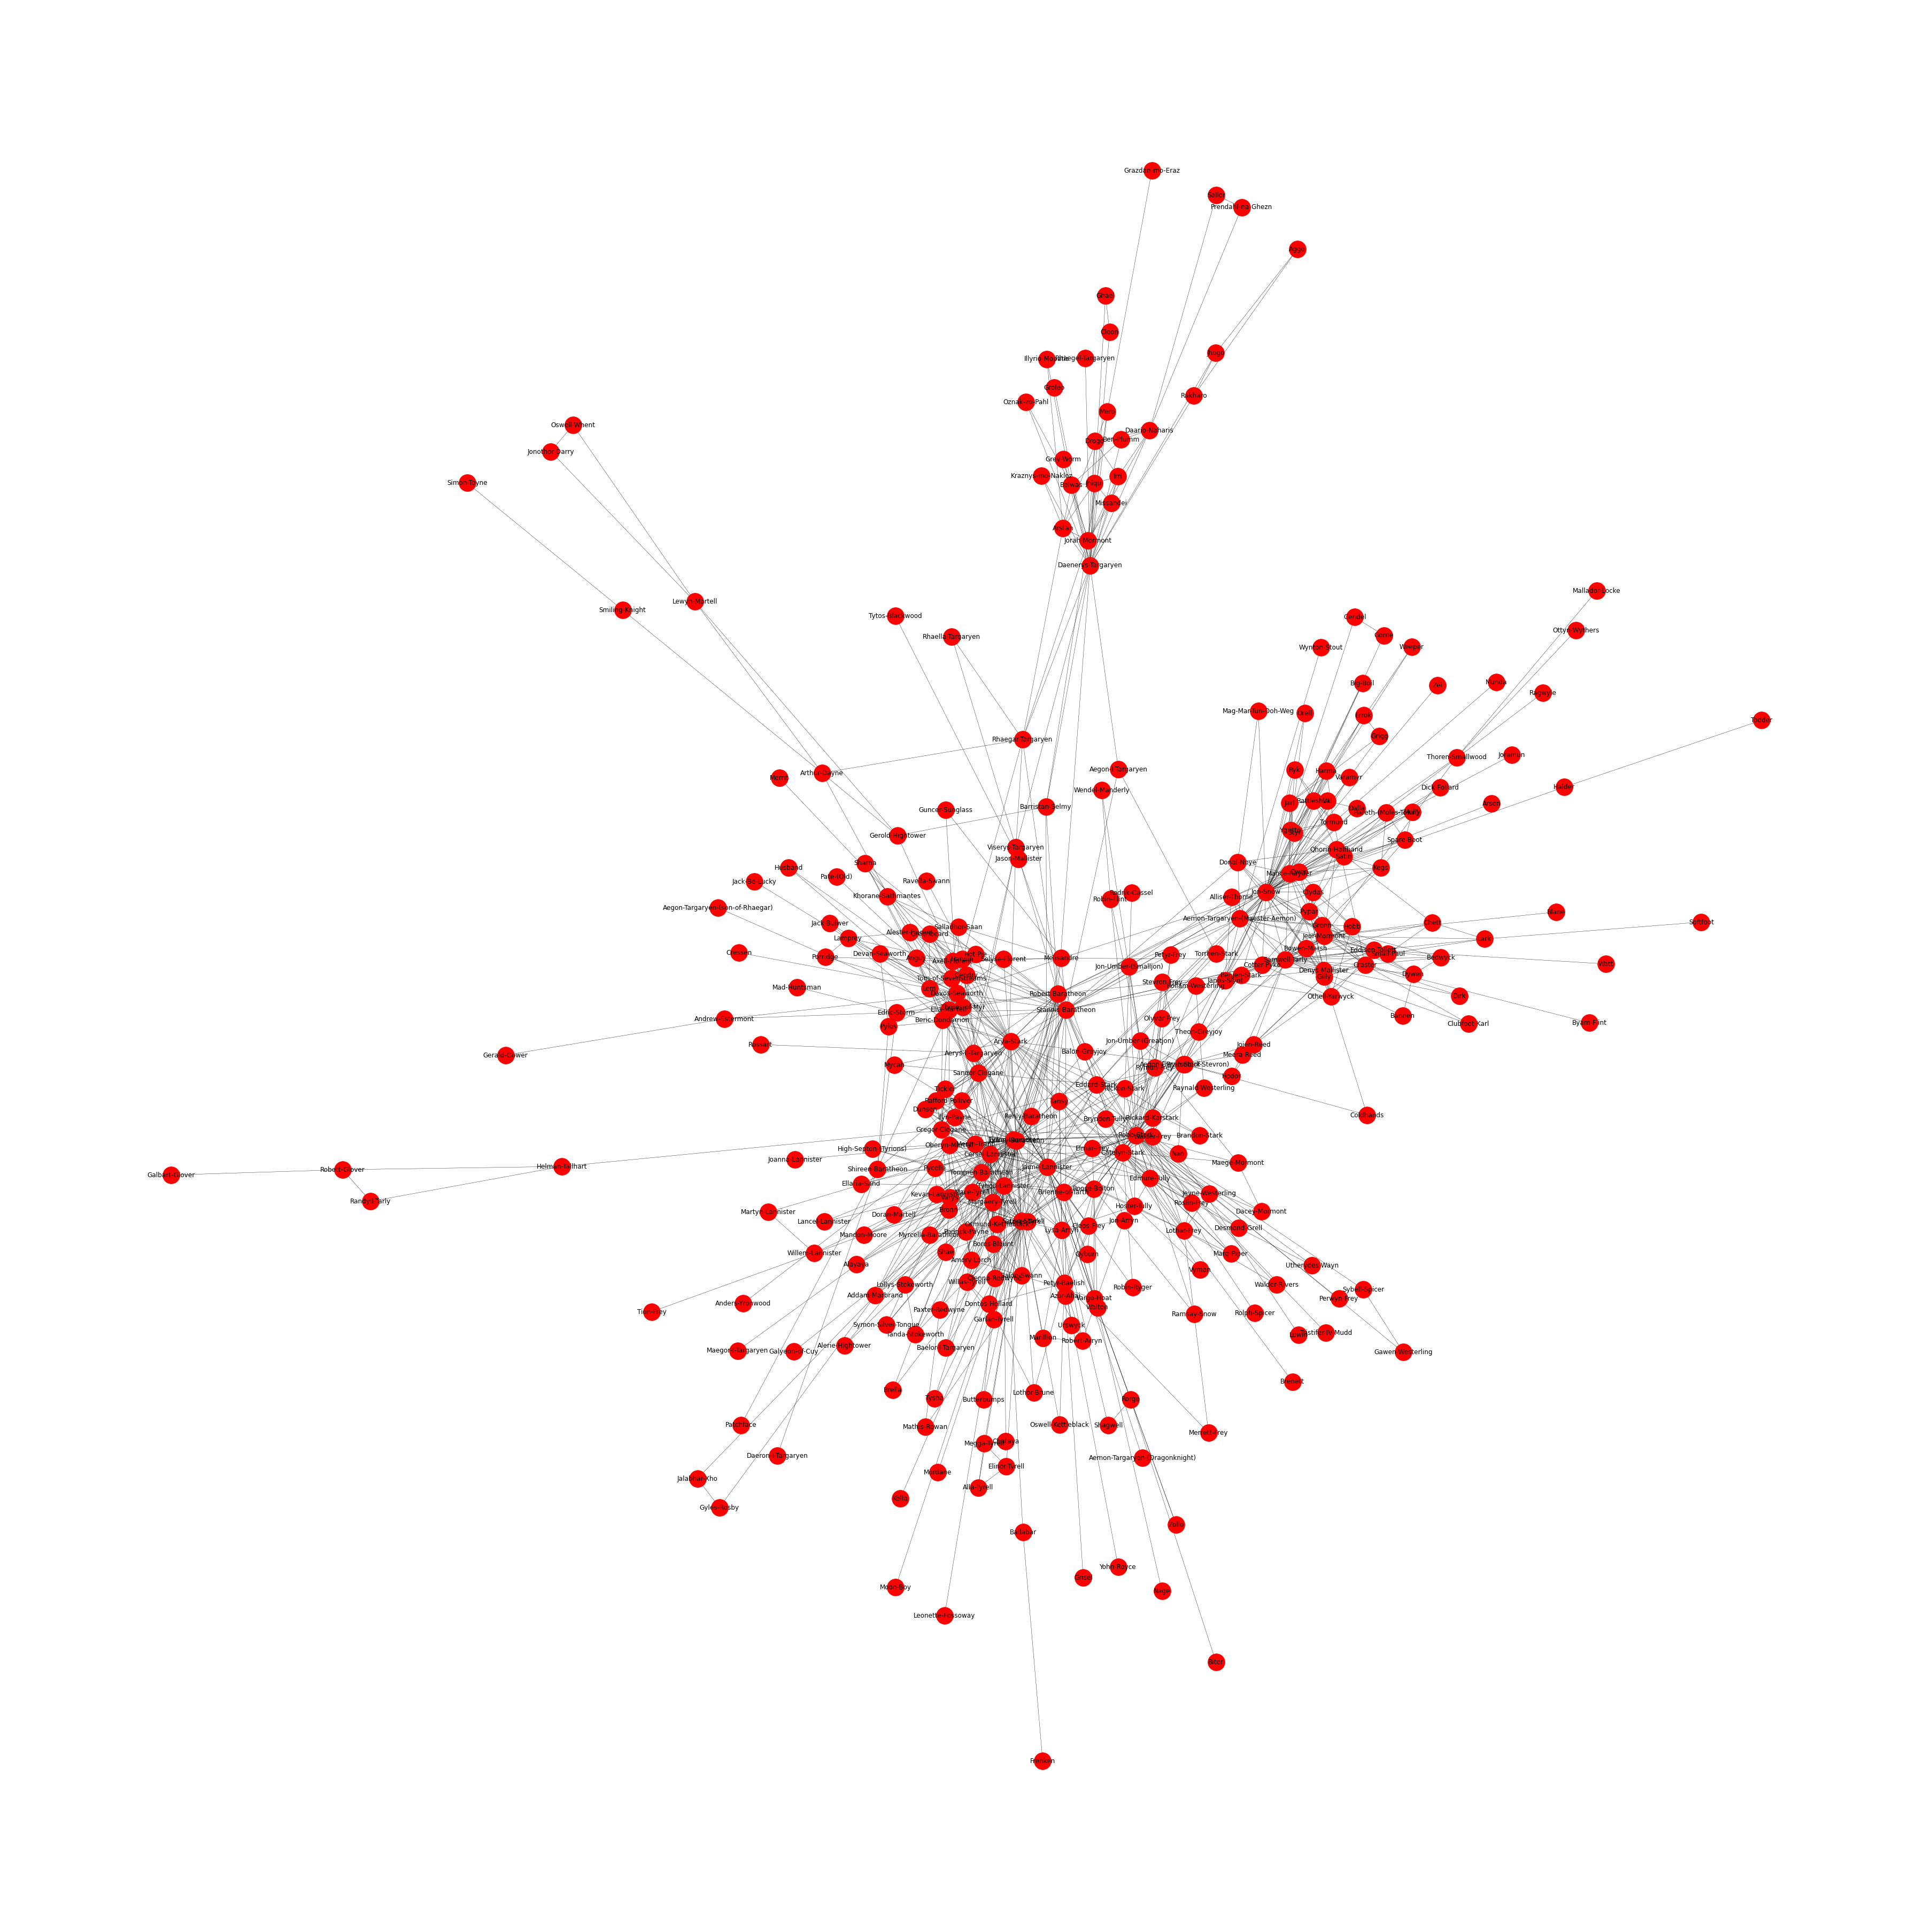

In [377]:
book3g = nx.Graph()

book3g = nx.from_pandas_edgelist(book3df,'Source','Target', edge_attr='weight')


plt.figure(figsize=(50,50))
nx.draw(book3g, with_labels = True, width=0.4, 
        node_color='red', node_size=1000)
plt.show()

Merging Book 3

In [378]:
targaryenbook3 = []
targaryenbook3 = book3df[book3df['Source'].str.contains("Targaryen")]
targaryenbook3
targaryen2book3 = []
targaryen2book3 = targaryenbook3[targaryenbook3['Target'].str.contains("Targaryen")]
targaryen2book3
targaryenstarkbook3 = []
targaryenstarkbook3 = targaryenbook3[targaryenbook3['Target'].str.contains("Stark")]
targaryenstarkbook3
combinedalltargaryenstark3 = targaryen2book3.append(targaryenstarkbook3)
combinedalltargaryenstark3
starkbook3 = []
starkbook3 = book3df[book3df['Source'].str.contains("Stark")]
starkbook3
stark2book3 = starkbook3[starkbook3['Target'].str.contains('Stark')]
stark2book3
starktargaryenbook3 = []
starktargaryenbook3 = starkbook3[starkbook3['Target'].str.contains("Targaryen")]
starktargaryenbook3
combinedallstarktargaryen3 = stark2book3.append(starktargaryenbook3)
combinedallstarktargaryen3
combinedstarktargaryenbook3 = targaryenstarkbook3.append(starktargaryenbook3)
combinedstarktargaryenbook3
allcombinedbook3 = combinedalltargaryenstark3.append(combinedallstarktargaryen3)
allcombinedbook3



Source              Target        Type  weight  book
12    Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       4     3
43   Aerys-II-Targaryen   Viserys-Targaryen  Undirected       3     3
378  Daenerys-Targaryen   Rhaegar-Targaryen  Undirected      13     3
379  Daenerys-Targaryen   Rhaegel-Targaryen  Undirected       5     3
381  Daenerys-Targaryen   Viserys-Targaryen  Undirected       8     3
915   Rhaegar-Targaryen   Rhaella-Targaryen  Undirected       3     3
917   Rhaegar-Targaryen   Viserys-Targaryen  Undirected       7     3
918   Rhaella-Targaryen   Viserys-Targaryen  Undirected       3     3
14    Aegon-I-Targaryen       Torrhen-Stark  Undirected       3     3
141  Baelor-I-Targaryen         Sansa-Stark  Undirected       3     3
97           Arya-Stark          Bran-Stark  Undirected       9     3
99           Arya-Stark       Catelyn-Stark  Undirected       3     3
102          Arya-Stark        Eddard-Stark  Undirected       6     3
122          Arya-Stark        Rickon-Stark  Undirected       8     3
123          Arya-Stark          Robb-Stark  Undirected      14     3
127          Arya-Stark         Sansa-Stark  Undirected      23     3
174        Benjen-Stark          Bran-Stark  Undirected       3     3
207          Bran-Stark       Catelyn-Stark  Undirected       3     3
209          Bran-Stark        Eddard-Stark  Undirected       7     3
217          Bran-Stark        Rickon-Stark  Undirected      31     3
218          Bran-Stark          Robb-Stark  Undirected      18     3
220          Bran-Stark         Sansa-Stark  Undirected      10     3
222       Brandon-Stark        Eddard-Stark  Undirected       8     3
223       Brandon-Stark        Rickon-Stark  Undirected       3     3
224       Brandon-Stark          Robb-Stark  Undirected       3     3
265       Catelyn-Stark        Eddard-Stark  Undirected       7     3
281       Catelyn-Stark          Robb-Stark  Undirected      48     3
287       Catelyn-Stark         Sansa-Stark  Undirected      11     3
446        Eddard-Stark        Rickon-Stark  Undirected       8     3
447        Eddard-Stark          Robb-Stark  Undirected      13     3
450        Eddard-Stark         Sansa-Stark  Undirected       6     3
451        Eddard-Stark       Torrhen-Stark  Undirected       3     3
920        Rickon-Stark          Robb-Stark  Undirected      13     3
921        Rickon-Stark         Sansa-Stark  Undirected       7     3
929          Robb-Stark         Sansa-Stark  Undirected      17     3

Creating Relationship network

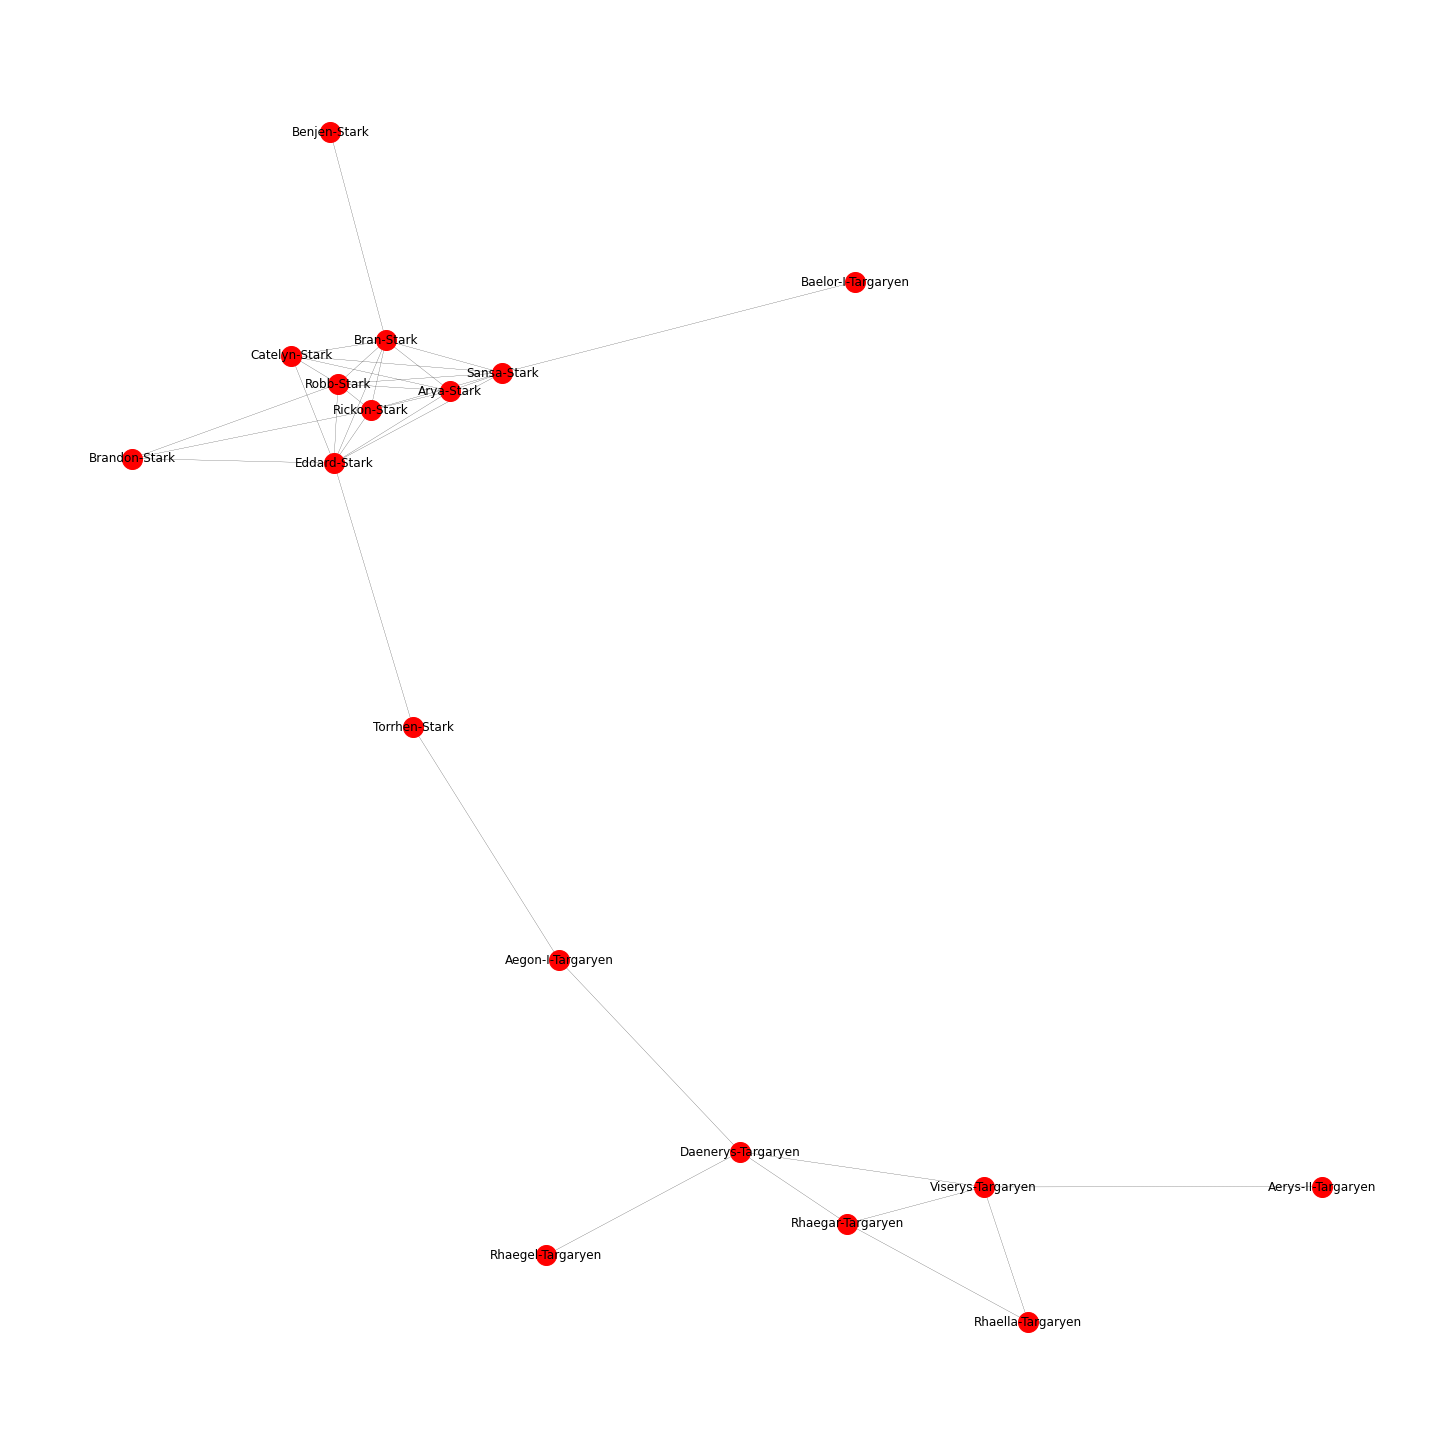

In [379]:
starktargaryen_book3_g = nx.from_pandas_edgelist(allcombinedbook3,'Source','Target', edge_attr='weight', create_using = nx.Graph())
plt.figure(figsize=(20,20))
nx.draw(starktargaryen_book3_g, with_labels = True, width=0.2, node_color='red', node_size=400)
plt.show(starktargaryen_book3_g)

Degree Distribution of Targaryen - Stark Relationship in Book 3

In [380]:
#degree frequency
degreedistbook3 = pd.DataFrame(nx.degree(starktargaryen_book3_g))
degreedistbook3[1].value_counts()

1    4
2    3
7    3
4    2
3    2
6    2
5    1
8    1
Name: 1, dtype: int64

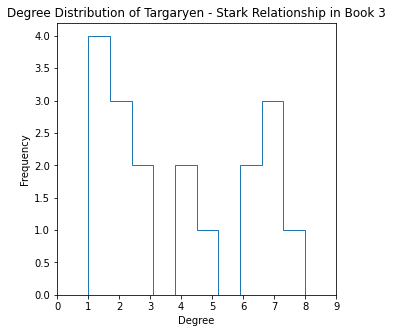

In [381]:
#plotting degree distribution
plt.figure(figsize=(5,5))
plt.hist(list(dict(nx.degree(starktargaryen_book3_g)).values()),histtype='step')
plt.title('Degree Distribution of Targaryen - Stark Relationship in Book 3')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.xticks(range(10))
plt.show()

Analysing book 2 stats: 

In [382]:
transform_graph(starktargaryen_book3_g, degreedistbook3)

Graph with 18 nodes and 35 edges
average clustering coefficient: 0.4759259259259259
Avg degree: 3.888888888888889
Assortativity coefficient: 0.2704298099981563
Diameter of graph: 7
average shortest path length: 3.2287581699346406


Betweenness Centrality

In [383]:
bcbook3 = nx.betweenness_centrality(starktargaryen_book3_g, normalized = True)
#Higher value of means higher centrality
bcbook3

{'Aegon-I-Targaryen': 0.4852941176470588,
 'Daenerys-Targaryen': 0.47058823529411764,
 'Aerys-II-Targaryen': 0.0,
 'Viserys-Targaryen': 0.16911764705882354,
 'Rhaegar-Targaryen': 0.051470588235294115,
 'Rhaegel-Targaryen': 0.0,
 'Rhaella-Targaryen': 0.0,
 'Torrhen-Stark': 0.5147058823529411,
 'Baelor-I-Targaryen': 0.0,
 'Sansa-Stark': 0.11911764705882352,
 'Arya-Stark': 0.0014705882352941176,
 'Bran-Stark': 0.11911764705882352,
 'Catelyn-Stark': 0.0,
 'Eddard-Stark': 0.546813725490196,
 'Rickon-Stark': 0.012254901960784312,
 'Robb-Stark': 0.017401960784313726,
 'Benjen-Stark': 0.0,
 'Brandon-Stark': 0.0}

<BarContainer object of 18 artists>

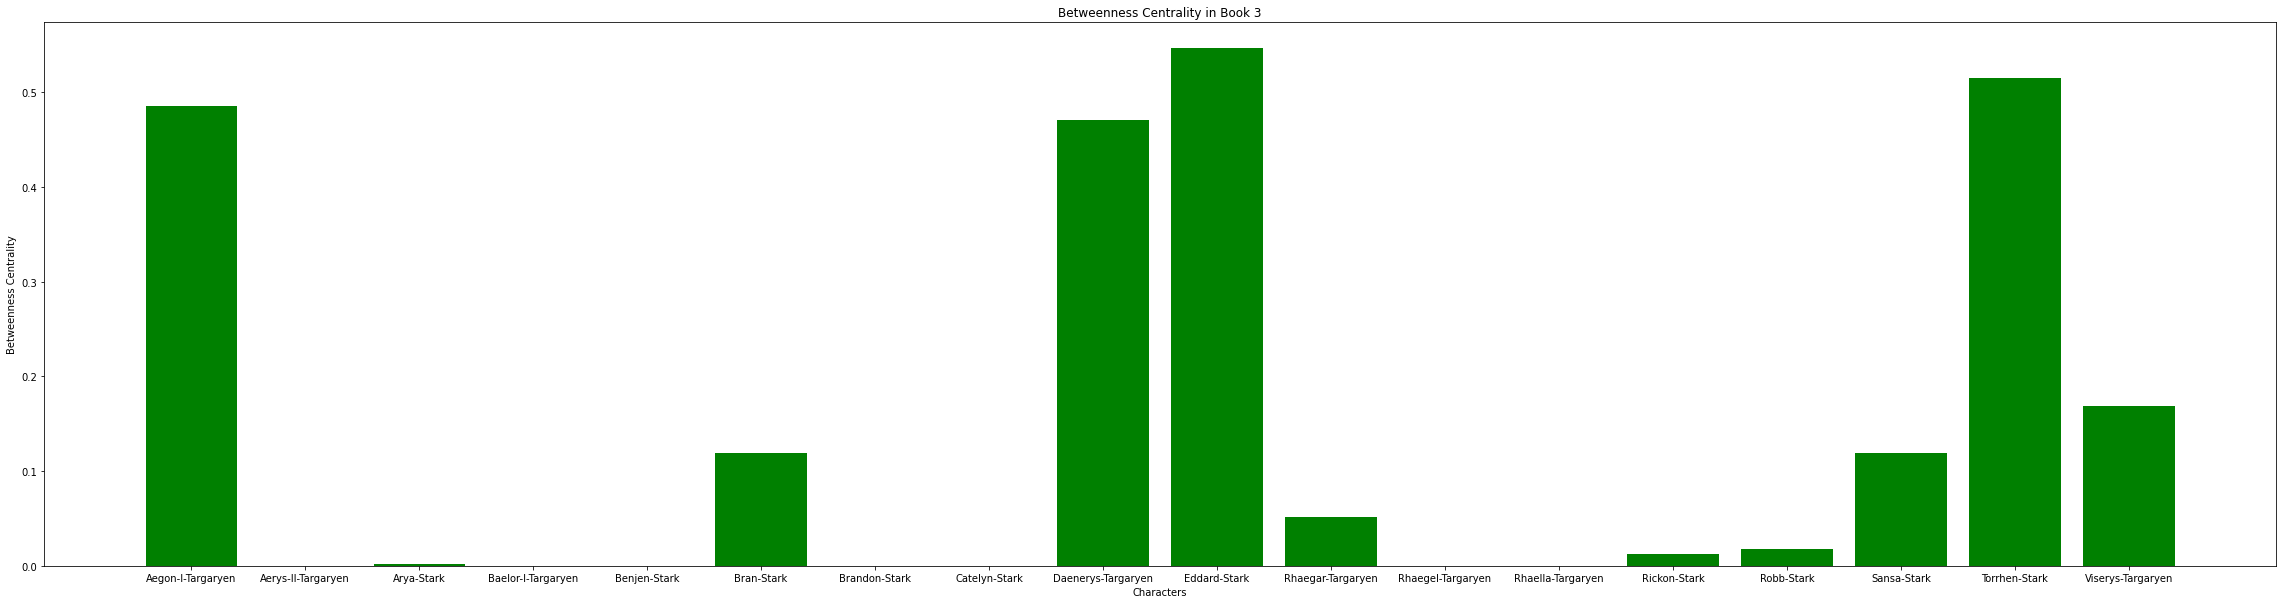

In [384]:
x,y = zip(*sorted(bcbook3.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality in Book 3')
plt.bar(x,y,color = "g")

In [385]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

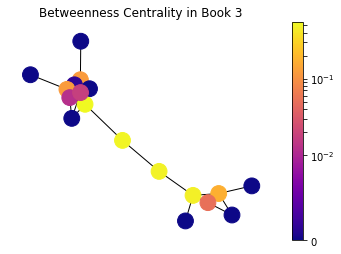

In [386]:
posbook3 = nx.spring_layout(starktargaryen_book3_g)
draw(starktargaryen_book3_g, posbook3, nx.betweenness_centrality(starktargaryen_book3_g), 'Betweenness Centrality in Book 3')

Closeness Centrality

In [387]:
ccbook3 = nx.closeness_centrality(starktargaryen_book3_g)
ccbook3

{'Aegon-I-Targaryen': 0.37777777777777777,
 'Daenerys-Targaryen': 0.3333333333333333,
 'Aerys-II-Targaryen': 0.21794871794871795,
 'Viserys-Targaryen': 0.27419354838709675,
 'Rhaegar-Targaryen': 0.2698412698412698,
 'Rhaegel-Targaryen': 0.2537313432835821,
 'Rhaella-Targaryen': 0.22077922077922077,
 'Torrhen-Stark': 0.4146341463414634,
 'Baelor-I-Targaryen': 0.2698412698412698,
 'Sansa-Stark': 0.3617021276595745,
 'Arya-Stark': 0.3541666666666667,
 'Bran-Stark': 0.3617021276595745,
 'Catelyn-Stark': 0.3469387755102041,
 'Eddard-Stark': 0.4358974358974359,
 'Rickon-Stark': 0.3541666666666667,
 'Robb-Stark': 0.3617021276595745,
 'Benjen-Stark': 0.2698412698412698,
 'Brandon-Stark': 0.32075471698113206}

<BarContainer object of 18 artists>

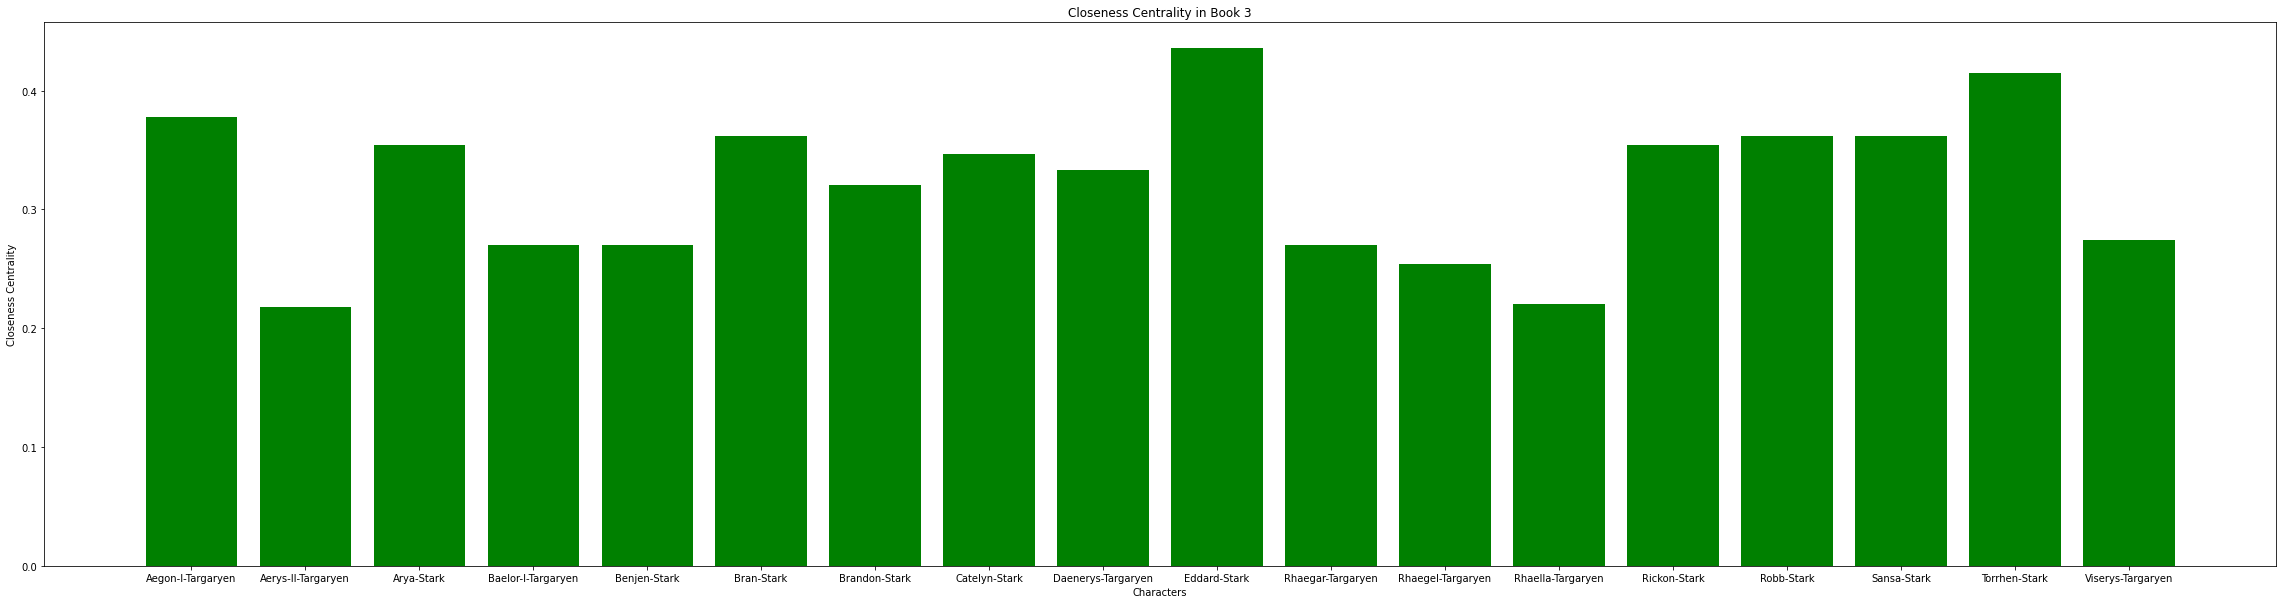

In [388]:
x,y = zip(*sorted(ccbook3.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality in Book 3')
plt.bar(x,y,color = "g")

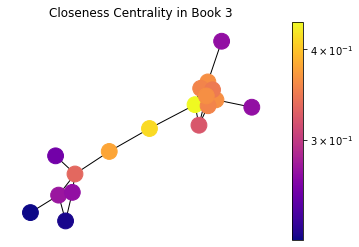

In [389]:
posbook3 = nx.spring_layout(starktargaryen_book3_g)
draw(starktargaryen_book3_g, posbook3, nx.closeness_centrality(starktargaryen_book3_g), 'Closeness Centrality in Book 3')

Merging Betweenness and Connectedness outputs

In [390]:
from collections import defaultdict
ddbook3 = defaultdict(list)

for d in (bcbook3, ccbook3): # you can list as many input dicts as you want here
    for key, value in d.items():
        ddbook3[key].append(value)

bcccbook3 = pd.DataFrame.from_dict(ddbook3)
bcccbook3 = bcccbook3.transpose()
bcccbook3

0         1
Aegon-I-Targaryen   0.485294  0.377778
Daenerys-Targaryen  0.470588  0.333333
Aerys-II-Targaryen  0.000000  0.217949
Viserys-Targaryen   0.169118  0.274194
Rhaegar-Targaryen   0.051471  0.269841
Rhaegel-Targaryen   0.000000  0.253731
Rhaella-Targaryen   0.000000  0.220779
Torrhen-Stark       0.514706  0.414634
Baelor-I-Targaryen  0.000000  0.269841
Sansa-Stark         0.119118  0.361702
Arya-Stark          0.001471  0.354167
Bran-Stark          0.119118  0.361702
Catelyn-Stark       0.000000  0.346939
Eddard-Stark        0.546814  0.435897
Rickon-Stark        0.012255  0.354167
Robb-Stark          0.017402  0.361702
Benjen-Stark        0.000000  0.269841
Brandon-Stark       0.000000  0.320755

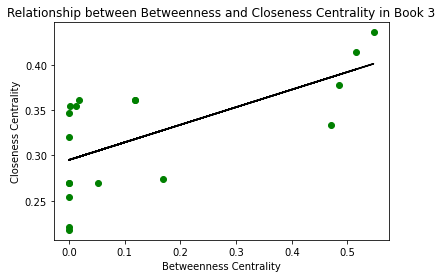

In [429]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

Xbook3 = bcccbook3[0].values[:,np.newaxis]
ybook3 = bcccbook3[1].values


model2 = LinearRegression()
model2.fit(Xbook3, ybook3)

plt.scatter(Xbook3, ybook3,color='g')
plt.plot(Xbook3, model2.predict(Xbook3),color='k')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Relationship between Betweenness and Closeness Centrality in Book 3')

plt.show()

Testing for Communities

In [392]:
from networkx.algorithms.community.centrality import girvan_newman
communitybook3 = girvan_newman(starktargaryen_book3_g)
commbook3 = tuple(sorted(c) for c in next(communitybook3))
commbook3

(['Aegon-I-Targaryen',
  'Aerys-II-Targaryen',
  'Daenerys-Targaryen',
  'Rhaegar-Targaryen',
  'Rhaegel-Targaryen',
  'Rhaella-Targaryen',
  'Torrhen-Stark',
  'Viserys-Targaryen'],
 ['Arya-Stark',
  'Baelor-I-Targaryen',
  'Benjen-Stark',
  'Bran-Stark',
  'Brandon-Stark',
  'Catelyn-Stark',
  'Eddard-Stark',
  'Rickon-Stark',
  'Robb-Stark',
  'Sansa-Stark'])

Book 4 Network

<Figure size 720x576 with 0 Axes>

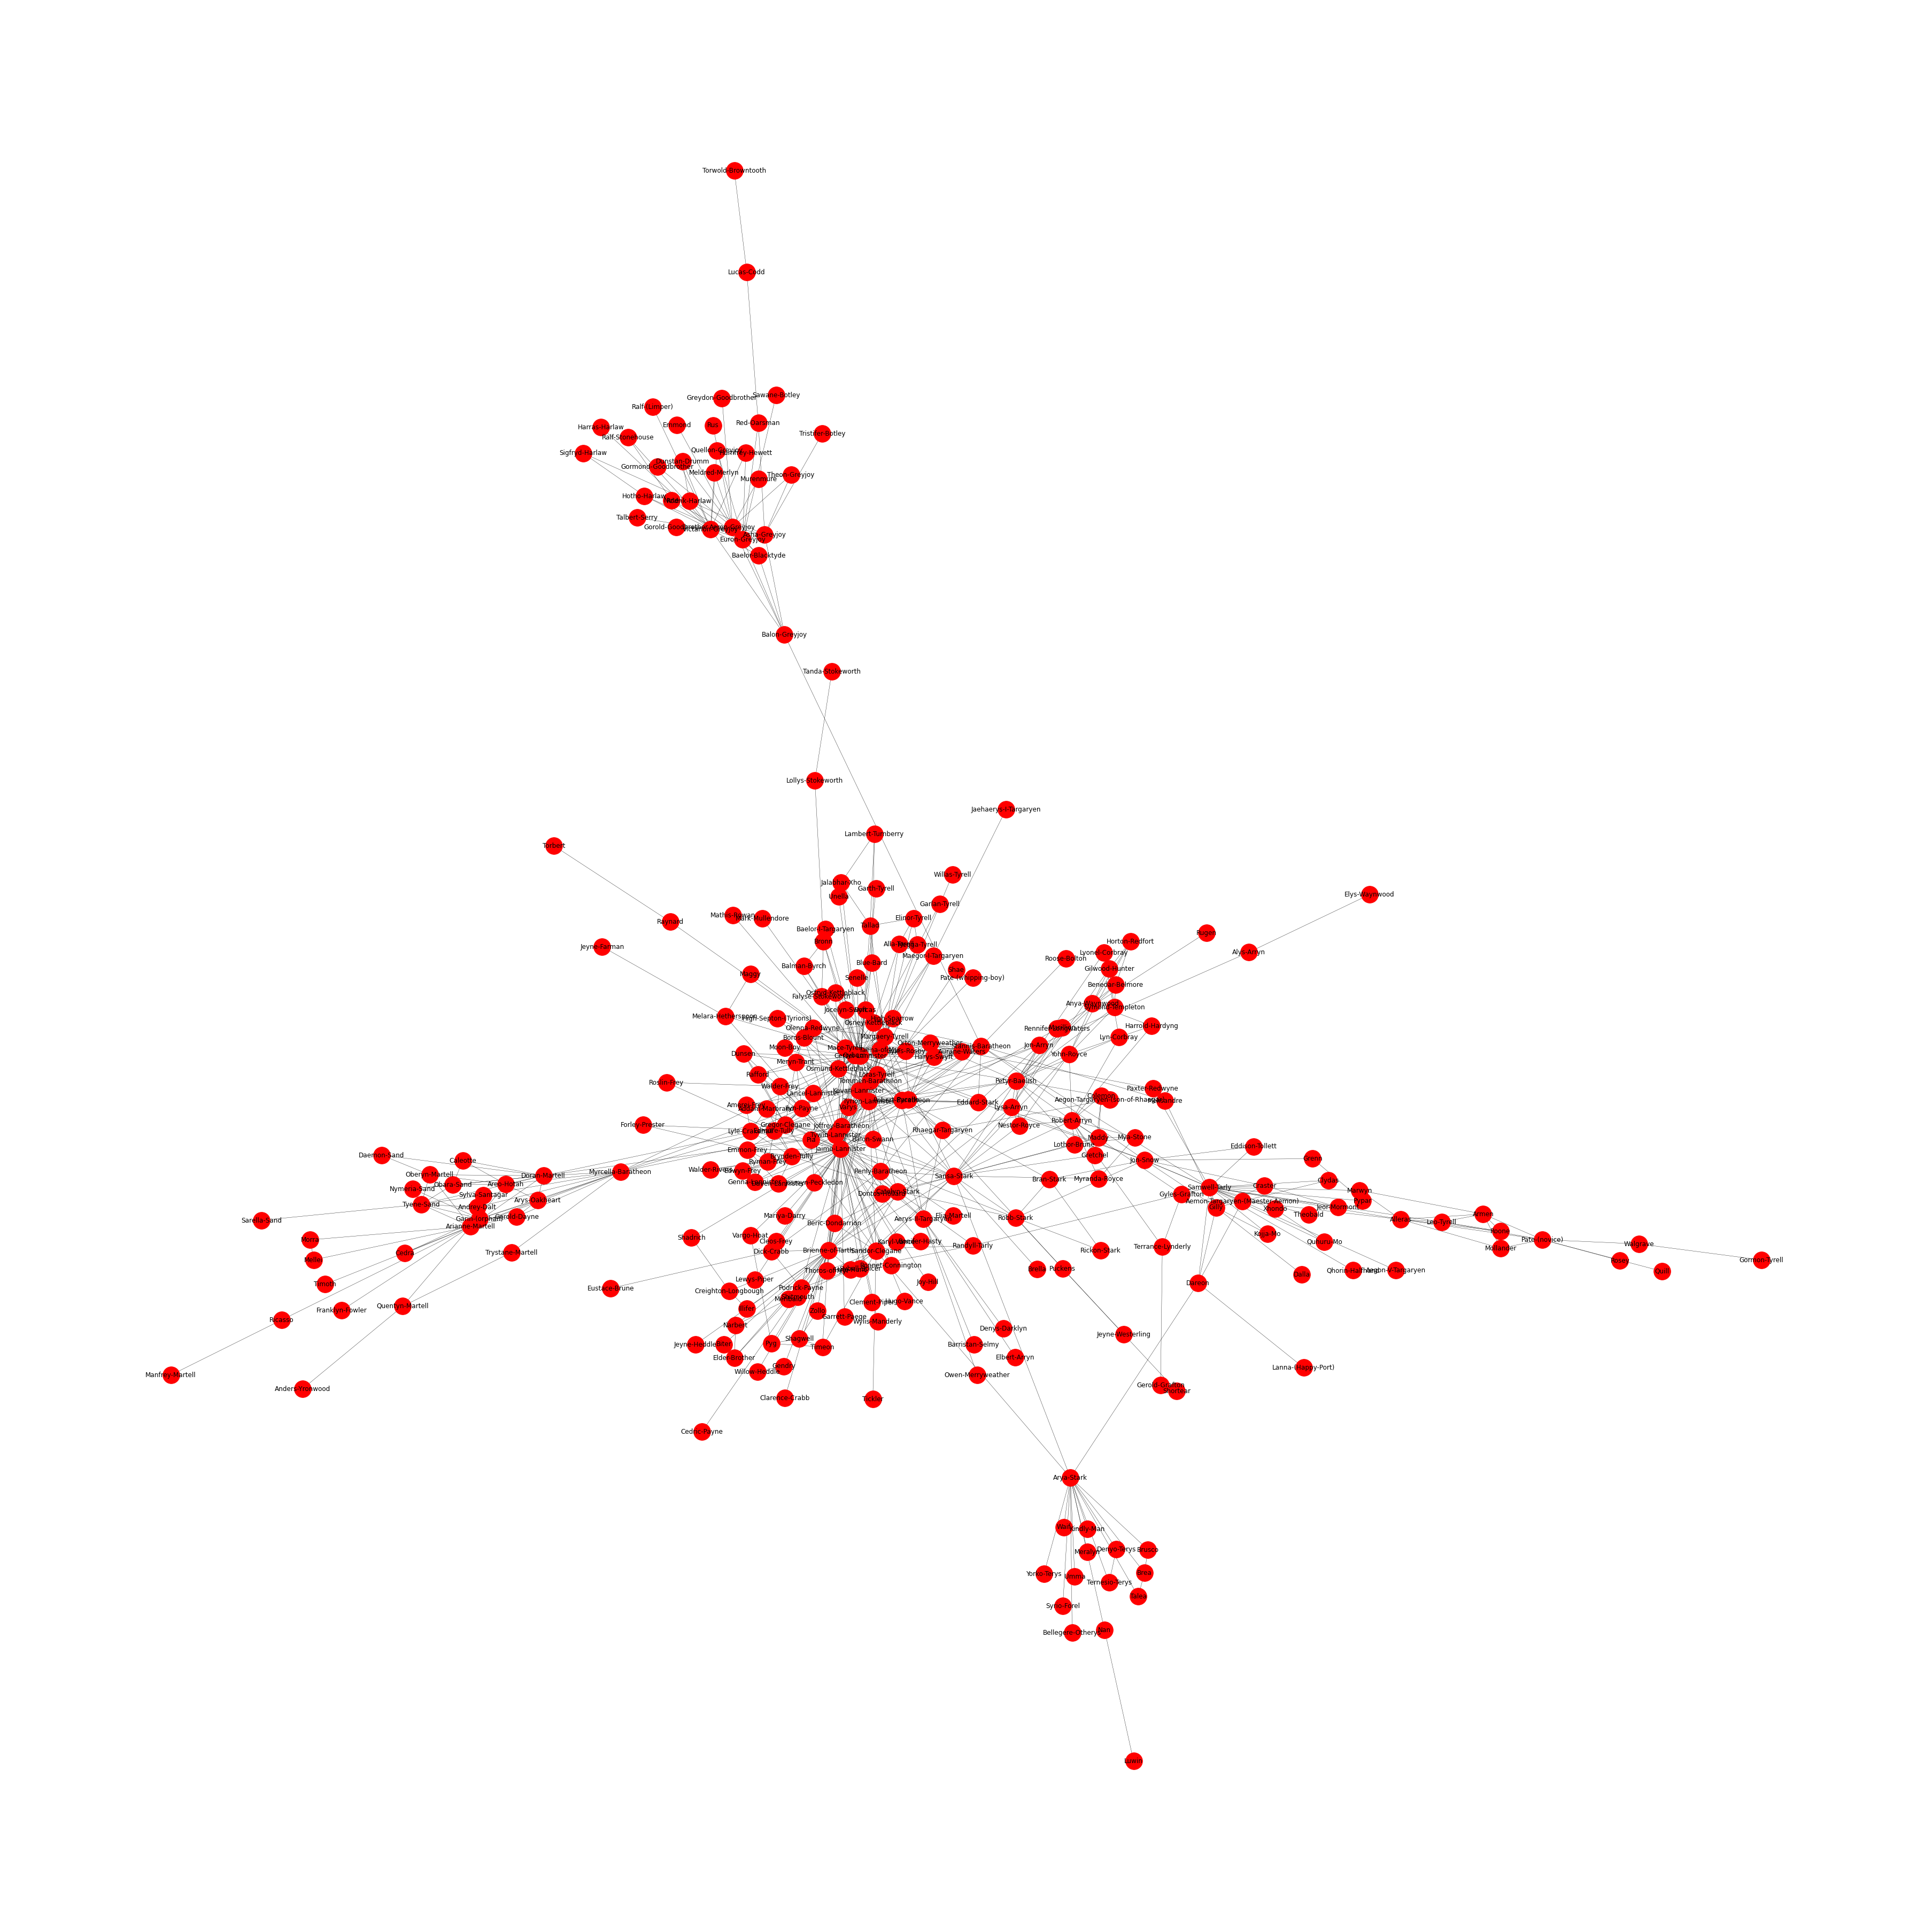

In [393]:
book4g = nx.Graph()

book4g = nx.from_pandas_edgelist(book4df,'Source','Target', edge_attr='weight')
figure(figsize=(10, 8))

plt.figure(figsize=(50,50))
nx.draw(book4g, with_labels = True, width=0.4, 
        node_color='red', node_size=1000)
plt.show()

Merging Book 4

In [394]:
targaryenbook4 = []
targaryenbook4 = book4df[book4df['Source'].str.contains("Targaryen")]
targaryenbook4
targaryen2book4 = []
targaryen2book4 = targaryenbook4[targaryenbook4['Target'].str.contains("Targaryen")]
targaryen2book4
targaryenstarkbook4 = []
targaryenstarkbook4 = targaryenbook4[targaryenbook4['Target'].str.contains("Stark")]
targaryenstarkbook4
combinedalltargaryenstark4 = targaryen2book4.append(targaryenstarkbook4)
combinedalltargaryenstark4
starkbook4 = []
starkbook4 = book4df[book4df['Source'].str.contains("Stark")]
starkbook4
stark2book4 = starkbook4[starkbook4['Target'].str.contains('Stark')]
stark2book4
starktargaryenbook4 = []
starktargaryenbook4 = starkbook4[starkbook4['Target'].str.contains("Targaryen")]
starktargaryenbook4
combinedallstarktargaryen4 = stark2book4.append(starktargaryenbook4)
combinedallstarktargaryen4
combinedstarktargaryenbook4 = targaryenstarkbook4.append(starktargaryenbook4)
combinedstarktargaryenbook4
allcombinedbook4 = combinedalltargaryenstark4.append(combinedallstarktargaryen4)
allcombinedbook4



Source                           Target  \
4    Aegon-Targaryen-(son-of-Rhaegar)                Rhaegar-Targaryen   
5                   Aegon-V-Targaryen  Aemon-Targaryen-(Maester-Aemon)   
32                 Aerys-II-Targaryen                Rhaegar-Targaryen   
428             Jaehaerys-I-Targaryen               Maegor-I-Targaryen   
100                        Arya-Stark                      Sansa-Stark   
162                        Bran-Stark                     Rickon-Stark   
163                        Bran-Stark                       Robb-Stark   
214                     Catelyn-Stark                       Robb-Stark   
215                     Catelyn-Stark                      Sansa-Stark   
641                      Rickon-Stark                       Robb-Stark   
642                        Robb-Stark                      Sansa-Stark   

           Type  weight  book  
4    undirected       3     4  
5    undirected       3     4  
32   undirected       5     4  
428  undirected       3     4  
100  undirected       4     4  
162  undirected       5     4  
163  undirected       5     4  
214  undirected       4     4  
215  undirected       9     4  
641  undirected       5     4  
642  undirected       3     4

Creating Relationship network

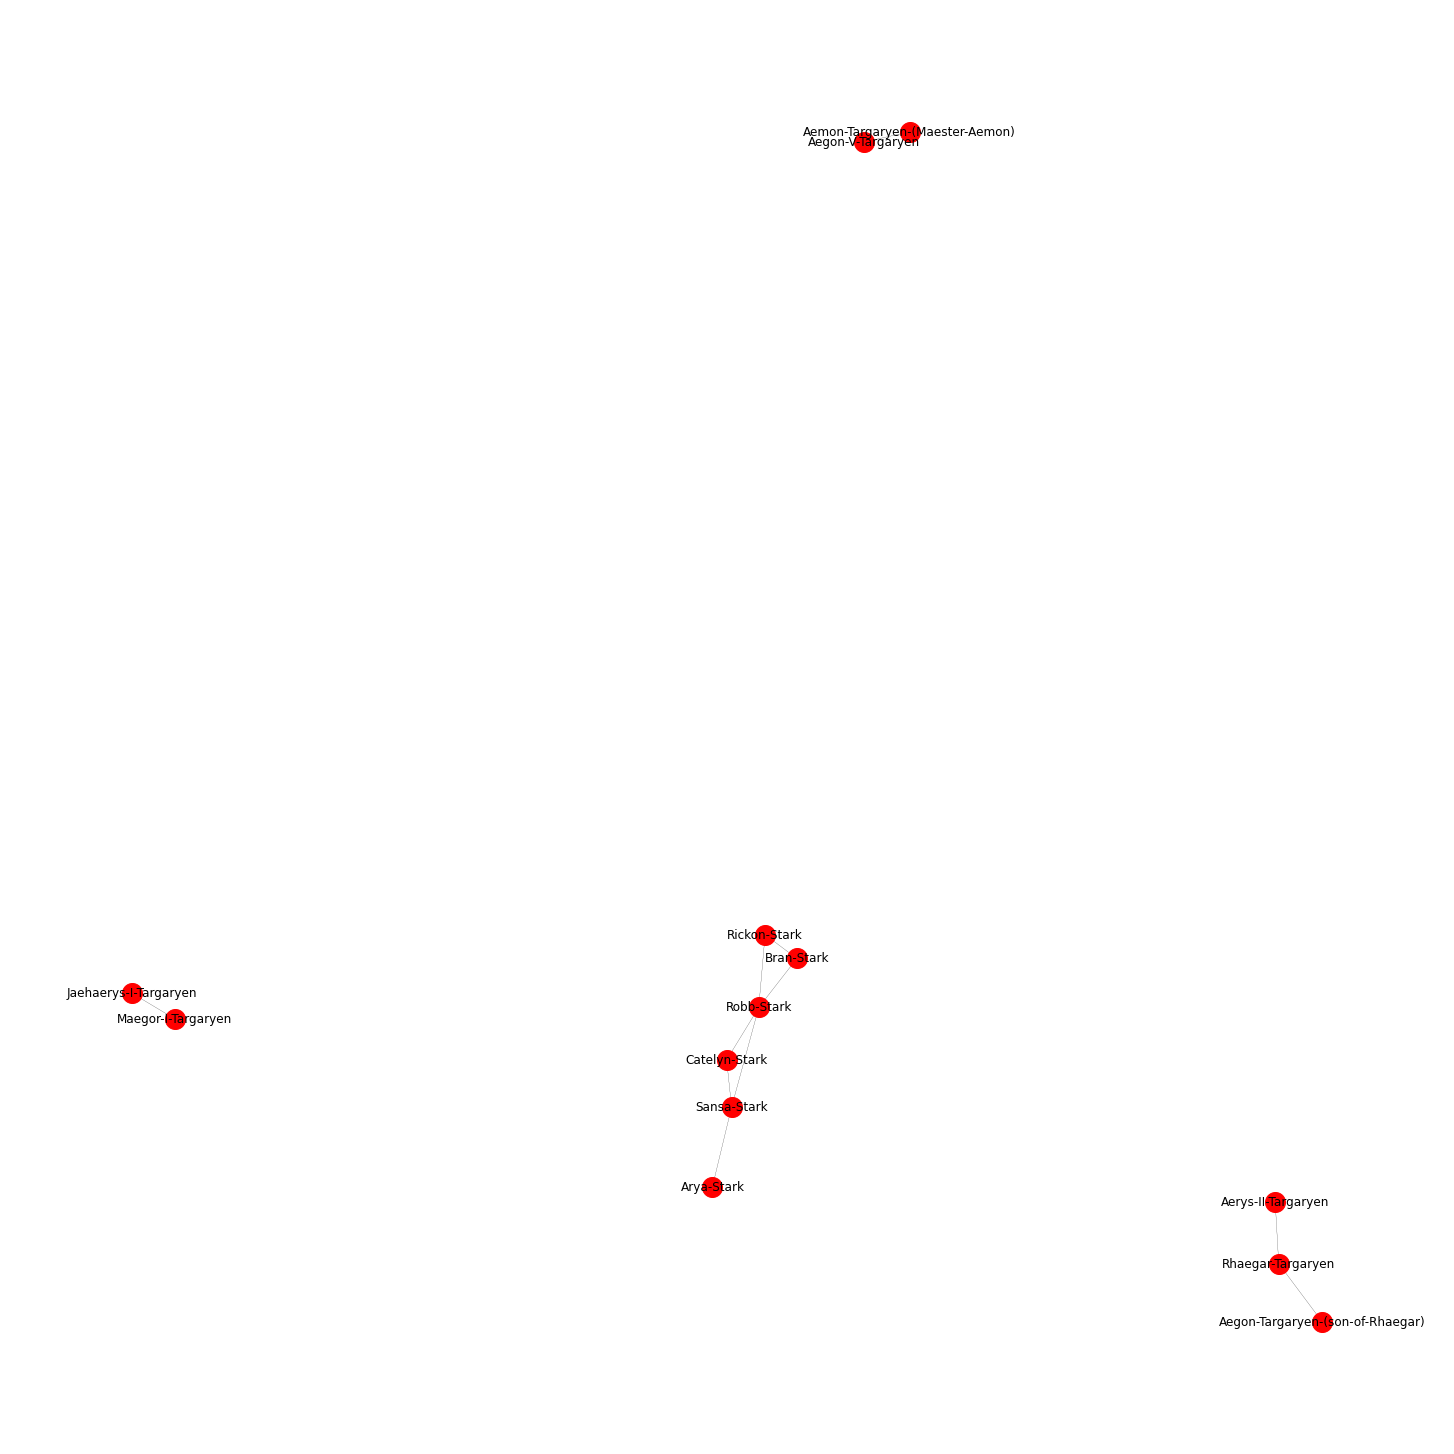

In [432]:
starktargaryen_book4_g = nx.from_pandas_edgelist(allcombinedbook4,'Source','Target', edge_attr='weight', create_using = nx.Graph())
plt.figure(figsize=(20,20))
nx.draw(starktargaryen_book4_g, with_labels = True, width=0.2, node_color='red', node_size=400)
plt.show(starktargaryen_book4_g)

Degree Distribution of Targaryen - Stark Relationship in Book 4

In [396]:
#degree frequency
degreedistbook4 = pd.DataFrame(nx.degree(starktargaryen_book4_g))
degreedistbook4[1].value_counts()

1    7
2    4
3    1
4    1
Name: 1, dtype: int64

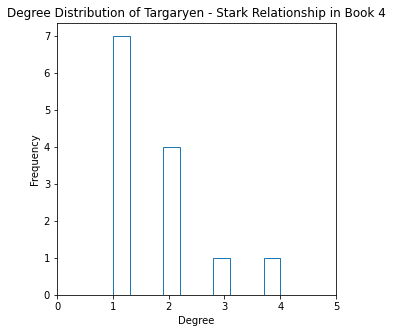

In [397]:
#plotting degree distribution
plt.figure(figsize=(5,5))
plt.hist(list(dict(nx.degree(starktargaryen_book4_g)).values()),histtype='step')
plt.title('Degree Distribution of Targaryen - Stark Relationship in Book 4')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.xticks(range(6))
plt.show()

Analysing book 4 stats: 

In [398]:
transform_graph(starktargaryen_book4_g, degreedistbook4)

Graph with 13 nodes and 11 edges
average clustering coefficient: 0.28205128205128205
Avg degree: 1.6923076923076923
Assortativity coefficient: 0.20863309352517972


Betweenness Centrality

In [399]:
bcbook4 = nx.betweenness_centrality(starktargaryen_book4_g, normalized = True)
#Higher value of means higher centrality
bcbook4

{'Aegon-Targaryen-(son-of-Rhaegar)': 0.0,
 'Rhaegar-Targaryen': 0.015151515151515152,
 'Aegon-V-Targaryen': 0.0,
 'Aemon-Targaryen-(Maester-Aemon)': 0.0,
 'Aerys-II-Targaryen': 0.0,
 'Jaehaerys-I-Targaryen': 0.0,
 'Maegor-I-Targaryen': 0.0,
 'Arya-Stark': 0.0,
 'Sansa-Stark': 0.06060606060606061,
 'Bran-Stark': 0.0,
 'Rickon-Stark': 0.0,
 'Robb-Stark': 0.09090909090909091,
 'Catelyn-Stark': 0.0}

<BarContainer object of 13 artists>

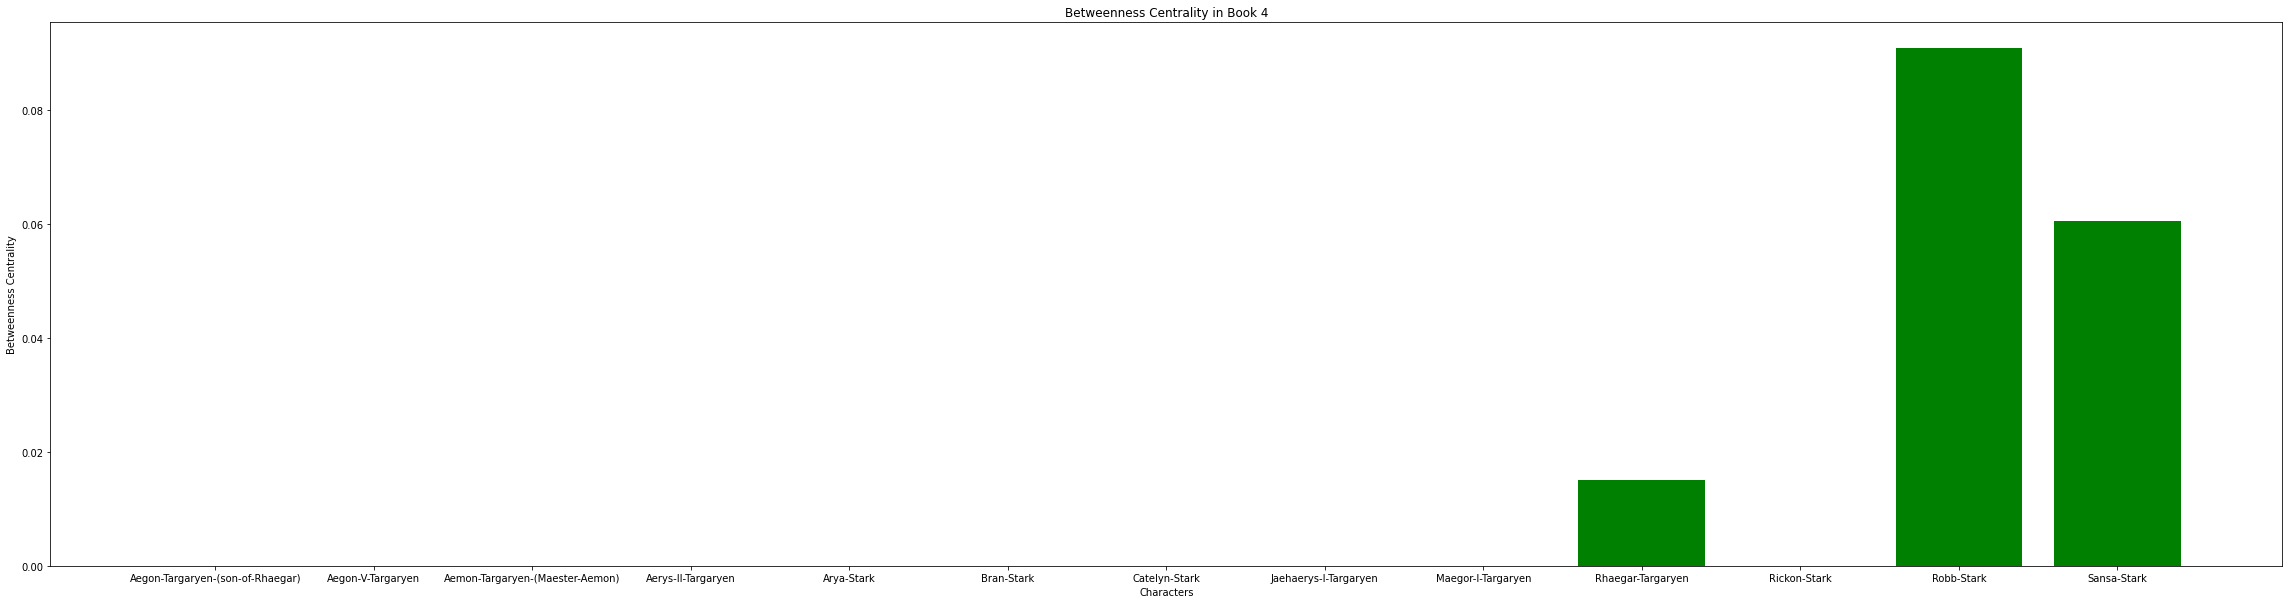

In [400]:
x,y = zip(*sorted(bcbook4.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality in Book 4')
plt.bar(x,y,color = "g")

In [401]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

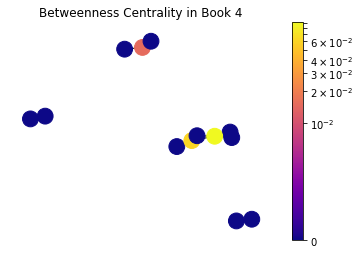

In [402]:
posbook4 = nx.spring_layout(starktargaryen_book4_g)
draw(starktargaryen_book4_g, posbook4, nx.betweenness_centrality(starktargaryen_book4_g), 'Betweenness Centrality in Book 4')

Closeness Centrality

In [403]:
ccbook4 = nx.closeness_centrality(starktargaryen_book4_g)
ccbook4

{'Aegon-Targaryen-(son-of-Rhaegar)': 0.1111111111111111,
 'Rhaegar-Targaryen': 0.16666666666666666,
 'Aegon-V-Targaryen': 0.08333333333333333,
 'Aemon-Targaryen-(Maester-Aemon)': 0.08333333333333333,
 'Aerys-II-Targaryen': 0.1111111111111111,
 'Jaehaerys-I-Targaryen': 0.08333333333333333,
 'Maegor-I-Targaryen': 0.08333333333333333,
 'Arya-Stark': 0.1893939393939394,
 'Sansa-Stark': 0.2976190476190476,
 'Bran-Stark': 0.2314814814814815,
 'Rickon-Stark': 0.2314814814814815,
 'Robb-Stark': 0.34722222222222227,
 'Catelyn-Stark': 0.2604166666666667}

<BarContainer object of 13 artists>

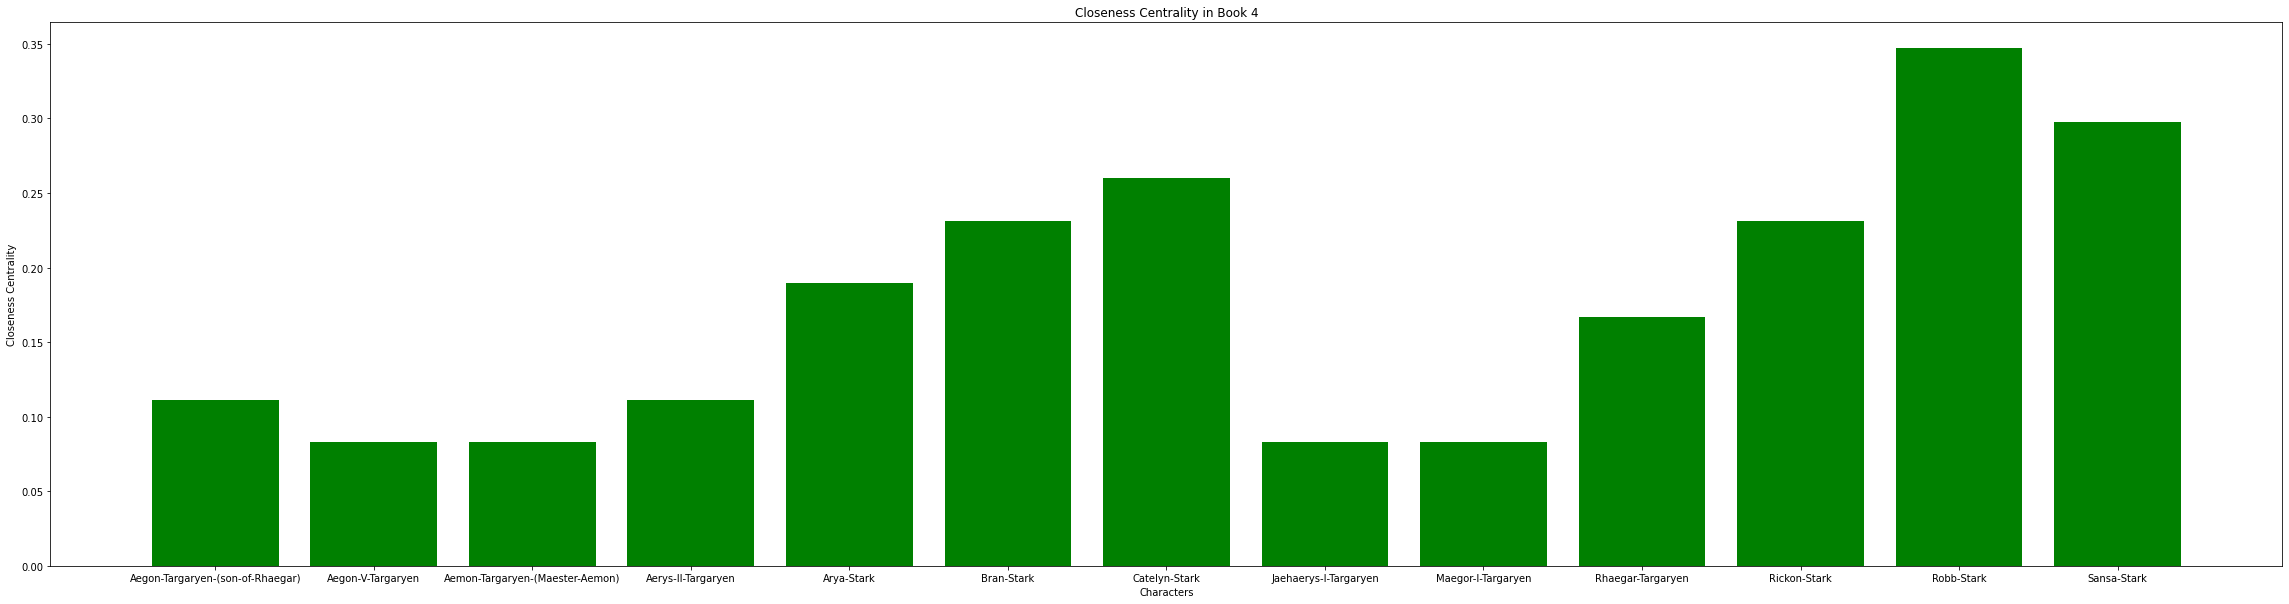

In [404]:
x,y = zip(*sorted(ccbook4.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality in Book 4')
plt.bar(x,y,color = "g")

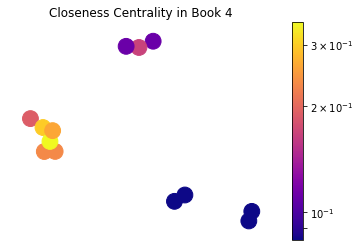

In [405]:
posbook4 = nx.spring_layout(starktargaryen_book4_g)
draw(starktargaryen_book4_g, posbook4, nx.closeness_centrality(starktargaryen_book4_g), 'Closeness Centrality in Book 4')

Merging Betweenness and Connectedness outputs

In [406]:
from collections import defaultdict
ddbook4= defaultdict(list)

for d in (bcbook4, ccbook4): # you can list as many input dicts as you want here
    for key, value in d.items():
        ddbook4[key].append(value)

bcccbook4 = pd.DataFrame.from_dict(ddbook4)
bcccbook4 = bcccbook4.transpose()
bcccbook4

0         1
Aegon-Targaryen-(son-of-Rhaegar)  0.000000  0.111111
Rhaegar-Targaryen                 0.015152  0.166667
Aegon-V-Targaryen                 0.000000  0.083333
Aemon-Targaryen-(Maester-Aemon)   0.000000  0.083333
Aerys-II-Targaryen                0.000000  0.111111
Jaehaerys-I-Targaryen             0.000000  0.083333
Maegor-I-Targaryen                0.000000  0.083333
Arya-Stark                        0.000000  0.189394
Sansa-Stark                       0.060606  0.297619
Bran-Stark                        0.000000  0.231481
Rickon-Stark                      0.000000  0.231481
Robb-Stark                        0.090909  0.347222
Catelyn-Stark                     0.000000  0.260417

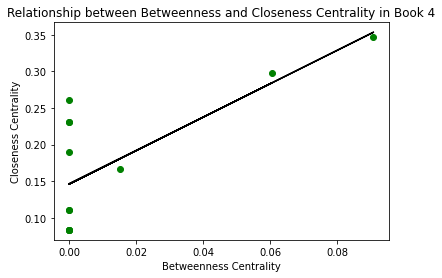

In [407]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

Xbook4 = bcccbook4[0].values[:,np.newaxis]
ybook4 = bcccbook4[1].values


model2 = LinearRegression()
model2.fit(Xbook4, ybook4)

plt.scatter(Xbook4, ybook4,color='g')
plt.plot(Xbook4, model2.predict(Xbook4),color='k')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Relationship between Betweenness and Closeness Centrality in Book 4')

plt.show()

Testing for Communities

In [408]:
from networkx.algorithms.community.centrality import girvan_newman
communitybook4 = girvan_newman(starktargaryen_book4_g)
commbook4 = tuple(sorted(c) for c in next(communitybook4))
commbook4

(['Aegon-Targaryen-(son-of-Rhaegar)',
  'Aerys-II-Targaryen',
  'Rhaegar-Targaryen'],
 ['Aegon-V-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)'],
 ['Jaehaerys-I-Targaryen', 'Maegor-I-Targaryen'],
 ['Arya-Stark', 'Catelyn-Stark', 'Sansa-Stark'],
 ['Bran-Stark', 'Rickon-Stark', 'Robb-Stark'])

Book 5 Network

<Figure size 720x576 with 0 Axes>

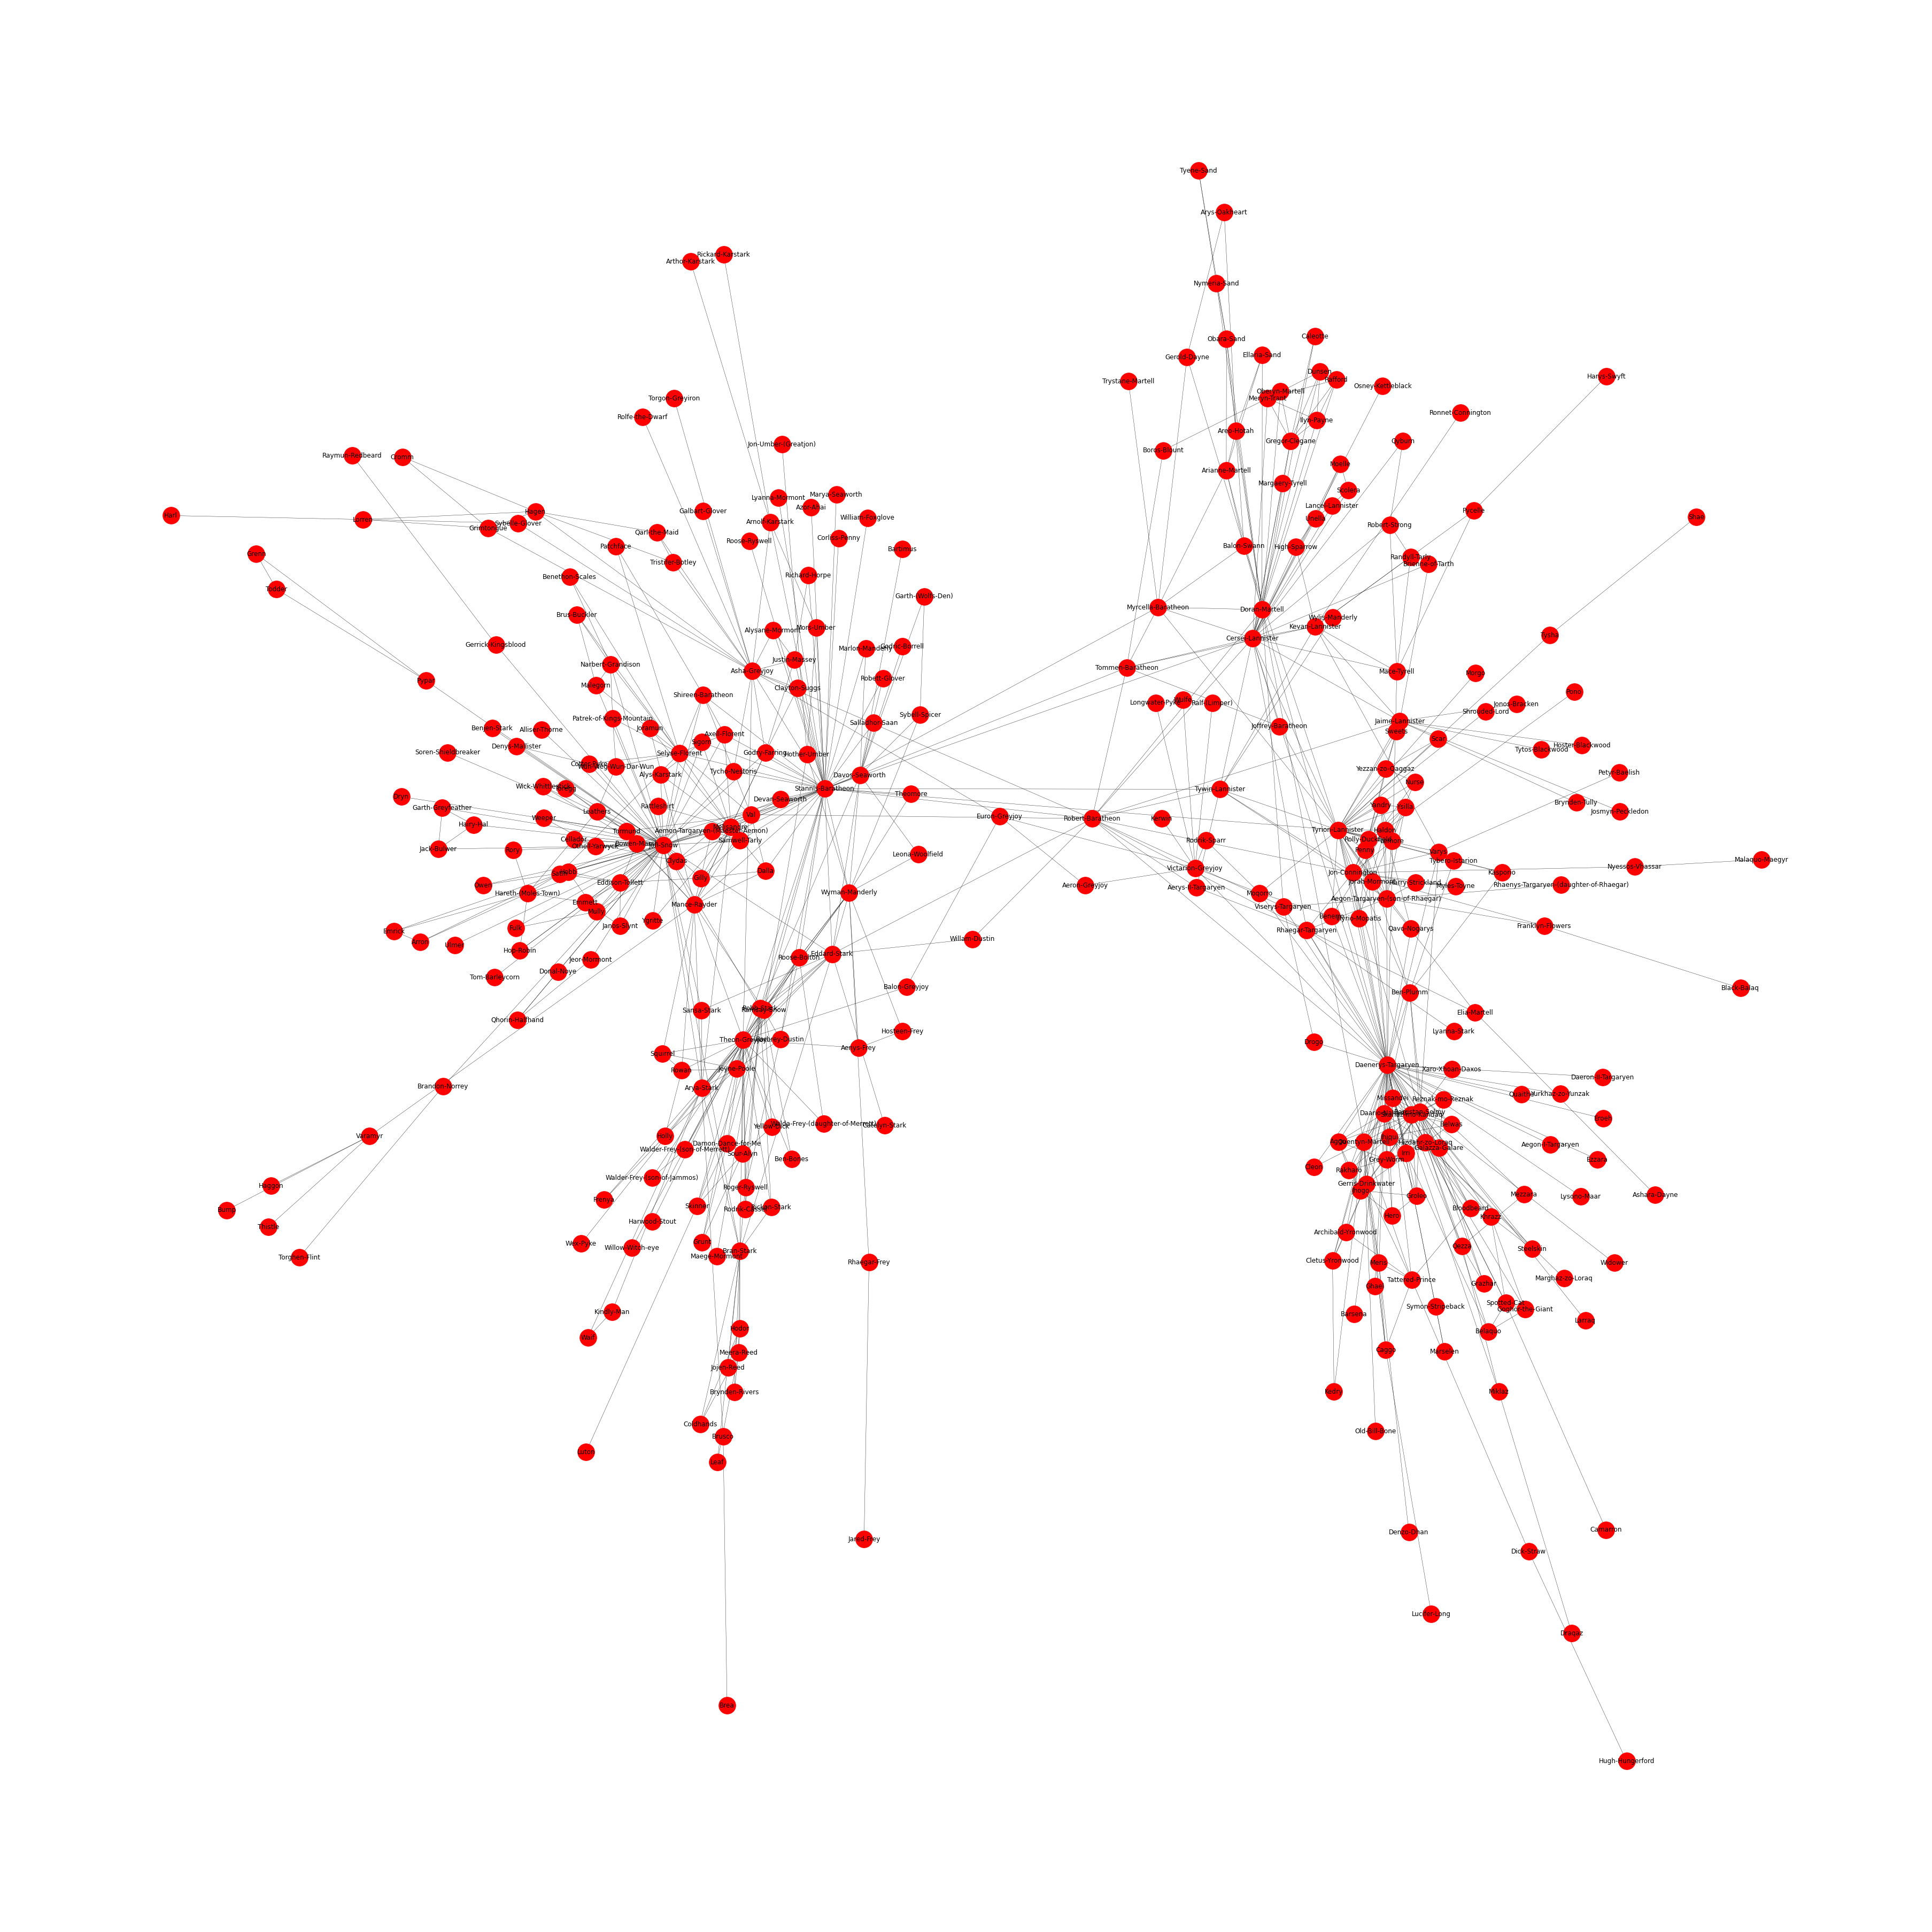

In [409]:
book5g = nx.Graph()

book5g = nx.from_pandas_edgelist(book5df,'Source','Target', edge_attr='weight')
figure(figsize=(10, 8))

plt.figure(figsize=(50,50))
nx.draw(book5g, with_labels = True, width=0.4, 
        node_color='red', node_size=1000)
plt.show()

Merging Book 5

In [410]:
targaryenbook5 = []
targaryenbook5 = book5df[book5df['Source'].str.contains("Targaryen")]
targaryenbook5
targaryen2book5 = []
targaryen2book5 = targaryenbook5[targaryenbook5['Target'].str.contains("Targaryen")]
targaryen2book5
targaryenstarkbook5 = []
targaryenstarkbook5 = targaryenbook5[targaryenbook5['Target'].str.contains("Stark")]
targaryenstarkbook5
combinedalltargaryenstark5 = targaryen2book5.append(targaryenstarkbook5)
combinedalltargaryenstark5
starkbook5 = []
starkbook5 = book5df[book5df['Source'].str.contains("Stark")]
starkbook5
stark2book5 = starkbook5[starkbook5['Target'].str.contains('Stark')]
stark2book5
starktargaryenbook5 = []
starktargaryenbook5 = starkbook5[starkbook5['Target'].str.contains("Targaryen")]
starktargaryenbook5
combinedallstarktargaryen5 = stark2book5.append(starktargaryenbook5)
combinedallstarktargaryen5
combinedstarktargaryenbook5 = targaryenstarkbook5.append(starktargaryenbook5)
combinedstarktargaryenbook5
allcombinedbook5 = combinedalltargaryenstark5.append(combinedallstarktargaryen5)
allcombinedbook5



Source  \
0                   Aegon-I-Targaryen   
1    Aegon-Targaryen-(son-of-Rhaegar)   
8    Aegon-Targaryen-(son-of-Rhaegar)   
9    Aegon-Targaryen-(son-of-Rhaegar)   
13   Aegon-Targaryen-(son-of-Rhaegar)   
26                 Aerys-II-Targaryen   
270                Daenerys-Targaryen   
303                Daenerys-Targaryen   
312                Daenerys-Targaryen   
65                         Arya-Stark   
67                         Arya-Stark   
74                         Arya-Stark   
180                        Bran-Stark   
186                        Bran-Stark   
187                        Bran-Stark   
208                     Catelyn-Stark   
364                      Eddard-Stark   
367                      Eddard-Stark   
679                      Rickon-Stark   
599                      Lyanna-Stark   

                                      Target        Type  weight  book  
0                         Daenerys-Targaryen  undirected       4     5  
1                         Daenerys-Targaryen  undirected      11     5  
8                          Rhaegar-Targaryen  undirected       9     5  
9    Rhaenys-Targaryen-(daughter-of-Rhaegar)  undirected       4     5  
13                         Viserys-Targaryen  undirected       3     5  
26                         Rhaegar-Targaryen  undirected       5     5  
270                      Daeron-II-Targaryen  undirected       3     5  
303                        Rhaegar-Targaryen  undirected      10     5  
312                        Viserys-Targaryen  undirected       7     5  
65                                Bran-Stark  undirected       7     5  
67                              Eddard-Stark  undirected       4     5  
74                               Sansa-Stark  undirected       4     5  
180                             Eddard-Stark  undirected       4     5  
186                             Rickon-Stark  undirected       7     5  
187                               Robb-Stark  undirected       6     5  
208                             Eddard-Stark  undirected       5     5  
364                               Robb-Stark  undirected       6     5  
367                              Sansa-Stark  undirected       3     5  
679                               Robb-Stark  undirected       3     5  
599                        Rhaegar-Targaryen  undirected       4     5

Creating Relationship network

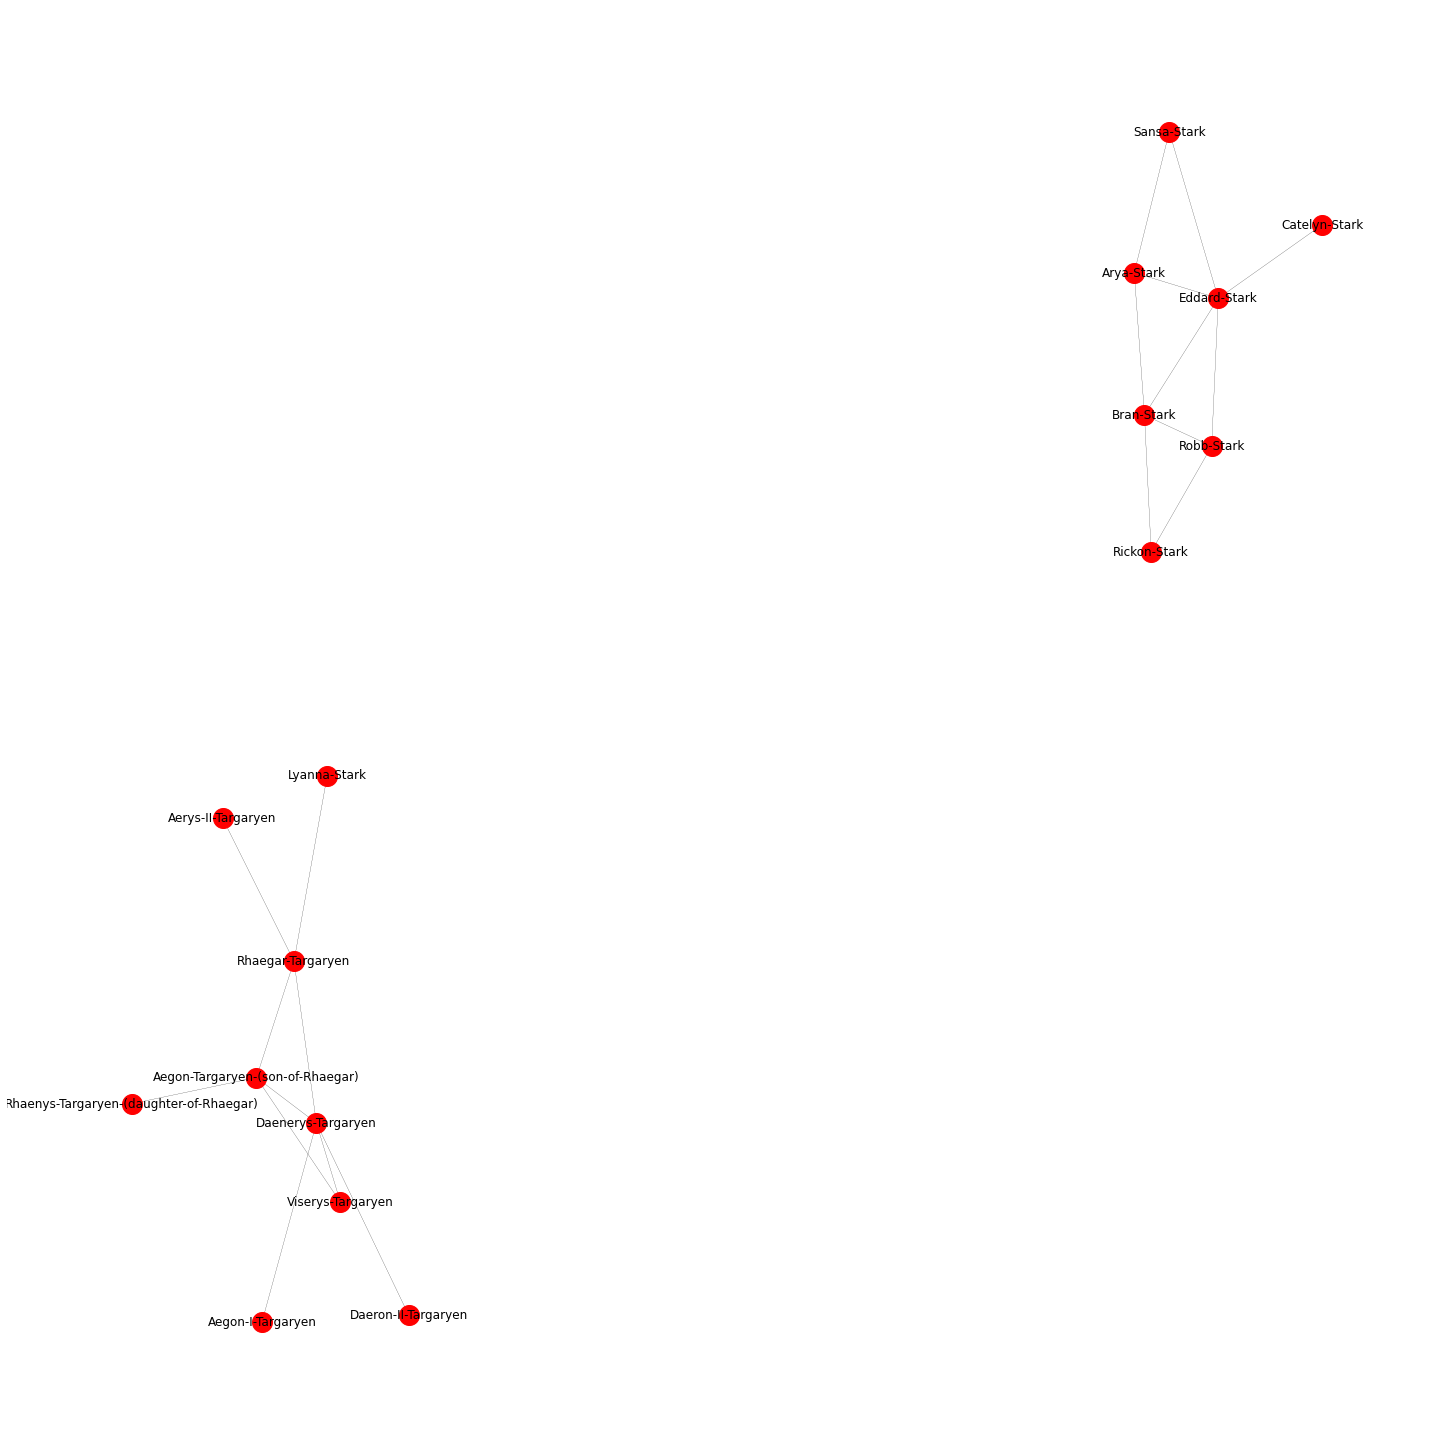

In [411]:
starktargaryen_book5_g = nx.from_pandas_edgelist(allcombinedbook5,'Source','Target', edge_attr='weight', create_using = nx.Graph())
plt.figure(figsize=(20,20))
nx.draw(starktargaryen_book5_g, with_labels = True, width=0.2, node_color='red', node_size=400)
plt.show(starktargaryen_book5_g)

Degree Distribution of Targaryen - Stark Relationship in Book 5

In [412]:
#degree frequency
degreedistbook5 = pd.DataFrame(nx.degree(starktargaryen_book5_g))
degreedistbook5[1].value_counts()

1    6
4    3
2    3
5    2
3    2
Name: 1, dtype: int64

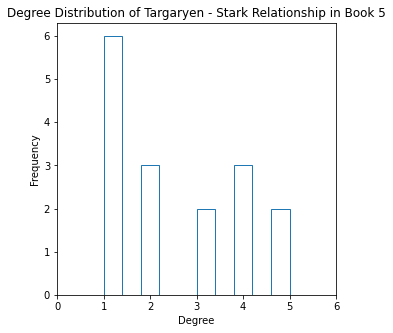

In [413]:
#plotting degree distribution
plt.figure(figsize=(5,5))
plt.hist(list(dict(nx.degree(starktargaryen_book5_g)).values()),histtype='step')
plt.title('Degree Distribution of Targaryen - Stark Relationship in Book 5')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.xticks(range(7))
plt.show()

Analysing book 4 stats: 

In [414]:
transform_graph(starktargaryen_book5_g, degreedistbook5)

Graph with 16 nodes and 20 edges
average clustering coefficient: 0.3645833333333333
Avg degree: 2.5
Assortativity coefficient: -0.5045395590142673


Betweenness Centrality

In [415]:
bcbook5 = nx.betweenness_centrality(starktargaryen_book5_g, normalized = True)
#Higher value of means higher centrality
bcbook5

{'Aegon-I-Targaryen': 0.0,
 'Daenerys-Targaryen': 0.1380952380952381,
 'Aegon-Targaryen-(son-of-Rhaegar)': 0.08095238095238096,
 'Rhaegar-Targaryen': 0.12380952380952381,
 'Rhaenys-Targaryen-(daughter-of-Rhaegar)': 0.0,
 'Viserys-Targaryen': 0.0,
 'Aerys-II-Targaryen': 0.0,
 'Daeron-II-Targaryen': 0.0,
 'Arya-Stark': 0.007936507936507936,
 'Bran-Stark': 0.03015873015873016,
 'Eddard-Stark': 0.07301587301587302,
 'Sansa-Stark': 0.0,
 'Rickon-Stark': 0.0,
 'Robb-Stark': 0.012698412698412698,
 'Catelyn-Stark': 0.0,
 'Lyanna-Stark': 0.0}

<BarContainer object of 16 artists>

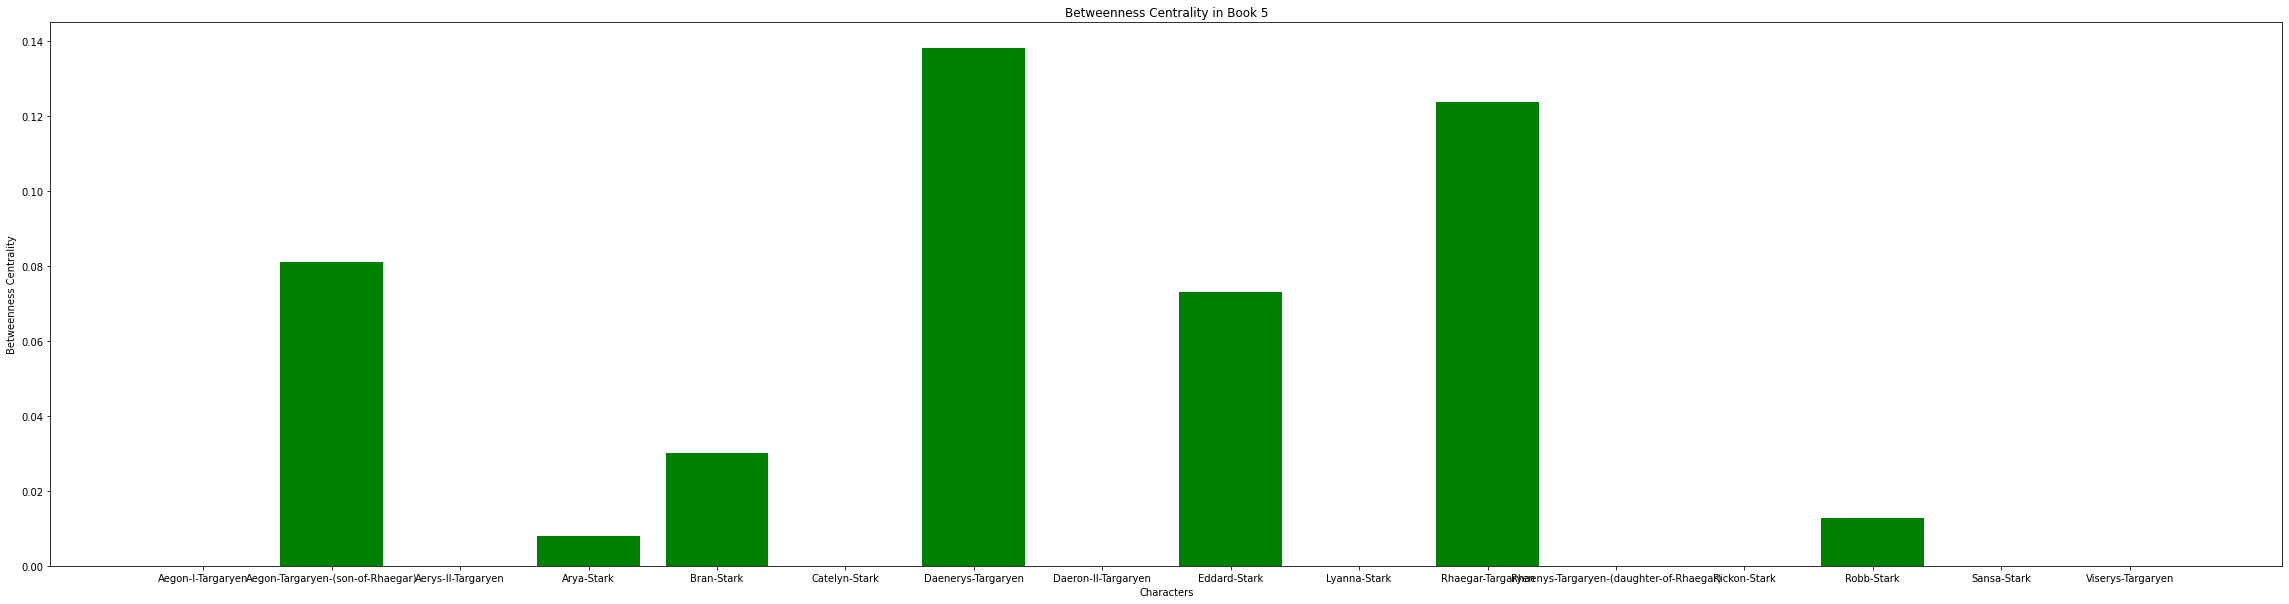

In [416]:
x,y = zip(*sorted(bcbook5.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality in Book 5')
plt.bar(x,y,color = "g")

In [417]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

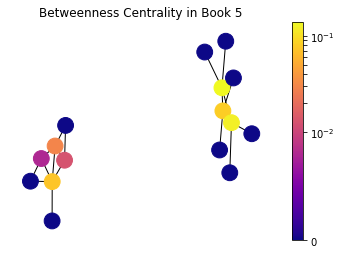

In [418]:
posbook5 = nx.spring_layout(starktargaryen_book5_g)
draw(starktargaryen_book5_g, posbook5, nx.betweenness_centrality(starktargaryen_book5_g), 'Betweenness Centrality in Book 5')

Closeness Centrality

In [419]:
ccbook5 = nx.closeness_centrality(starktargaryen_book5_g)
ccbook5

{'Aegon-I-Targaryen': 0.23703703703703702,
 'Daenerys-Targaryen': 0.3878787878787879,
 'Aegon-Targaryen-(son-of-Rhaegar)': 0.3555555555555555,
 'Rhaegar-Targaryen': 0.3555555555555555,
 'Rhaenys-Targaryen-(daughter-of-Rhaegar)': 0.2245614035087719,
 'Viserys-Targaryen': 0.26666666666666666,
 'Aerys-II-Targaryen': 0.2245614035087719,
 'Daeron-II-Targaryen': 0.23703703703703702,
 'Arya-Stark': 0.26666666666666666,
 'Bran-Stark': 0.30000000000000004,
 'Eddard-Stark': 0.34285714285714286,
 'Sansa-Stark': 0.21818181818181817,
 'Rickon-Stark': 0.2,
 'Robb-Stark': 0.26666666666666666,
 'Catelyn-Stark': 0.2,
 'Lyanna-Stark': 0.2245614035087719}

<BarContainer object of 16 artists>

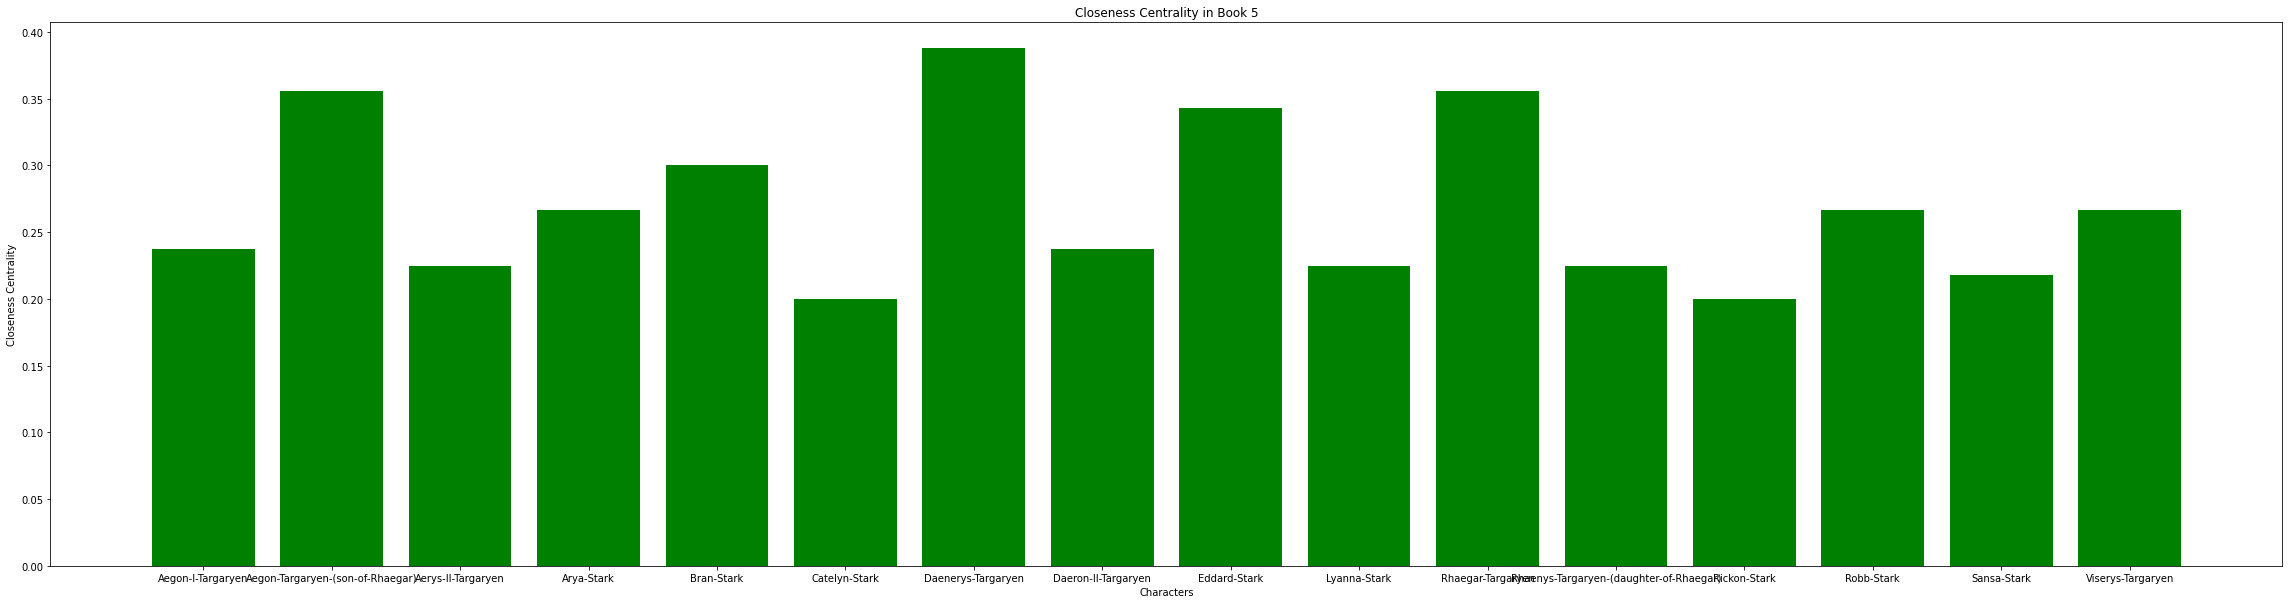

In [420]:
x,y = zip(*sorted(ccbook5.items()))
plt.figure(figsize=(40,10))
plt.xlabel('Characters')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality in Book 5')
plt.bar(x,y,color = "g")

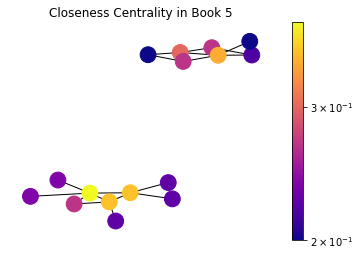

In [421]:
posbook5 = nx.spring_layout(starktargaryen_book5_g)
draw(starktargaryen_book5_g, posbook5, nx.closeness_centrality(starktargaryen_book5_g), 'Closeness Centrality in Book 5')

Merging Betweenness and Connectedness outputs

In [422]:
from collections import defaultdict
ddbook5= defaultdict(list)

for d in (bcbook5, ccbook5): # you can list as many input dicts as you want here
    for key, value in d.items():
        ddbook5[key].append(value)

bcccbook5 = pd.DataFrame.from_dict(ddbook5)
bcccbook5 = bcccbook5.transpose()
bcccbook5

0         1
Aegon-I-Targaryen                        0.000000  0.237037
Daenerys-Targaryen                       0.138095  0.387879
Aegon-Targaryen-(son-of-Rhaegar)         0.080952  0.355556
Rhaegar-Targaryen                        0.123810  0.355556
Rhaenys-Targaryen-(daughter-of-Rhaegar)  0.000000  0.224561
Viserys-Targaryen                        0.000000  0.266667
Aerys-II-Targaryen                       0.000000  0.224561
Daeron-II-Targaryen                      0.000000  0.237037
Arya-Stark                               0.007937  0.266667
Bran-Stark                               0.030159  0.300000
Eddard-Stark                             0.073016  0.342857
Sansa-Stark                              0.000000  0.218182
Rickon-Stark                             0.000000  0.200000
Robb-Stark                               0.012698  0.266667
Catelyn-Stark                            0.000000  0.200000
Lyanna-Stark                             0.000000  0.224561

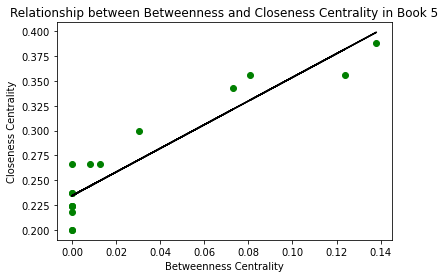

In [423]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

Xbook5 = bcccbook5[0].values[:,np.newaxis]
ybook5 = bcccbook5[1].values


model2 = LinearRegression()
model2.fit(Xbook5, ybook5)

plt.scatter(Xbook5, ybook5,color='g')
plt.plot(Xbook5, model2.predict(Xbook5),color='k')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Closeness Centrality')
plt.title('Relationship between Betweenness and Closeness Centrality in Book 5')

plt.show()

Testing for Communities

In [424]:
from networkx.algorithms.community.centrality import girvan_newman
communitybook5 = girvan_newman(starktargaryen_book5_g)
commbook5 = tuple(sorted(c) for c in next(communitybook5))
commbook5

(['Aegon-I-Targaryen',
  'Aegon-Targaryen-(son-of-Rhaegar)',
  'Daenerys-Targaryen',
  'Daeron-II-Targaryen',
  'Rhaenys-Targaryen-(daughter-of-Rhaegar)',
  'Viserys-Targaryen'],
 ['Aerys-II-Targaryen', 'Lyanna-Stark', 'Rhaegar-Targaryen'],
 ['Arya-Stark',
  'Bran-Stark',
  'Catelyn-Stark',
  'Eddard-Stark',
  'Rickon-Stark',
  'Robb-Stark',
  'Sansa-Stark'])